In [1]:
!pip install adjustText

In [ ]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text

In [ ]:
# prompt: import from drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/OOKLA_DATA')

In [ ]:
def load_and_intersect(year, quarter, distrital_gdf):
    file_path = f'input/{year}/pe_{year}_{quarter}.shp'
    gdf = gp.read_file(file_path)
    gdf = gdf.to_crs(distrital_gdf.crs)

    # Realiza la intersección espacial
    distrital_data = gp.sjoin(gdf, distrital_gdf, how="inner", op="intersects")

    # Añade columnas de año y trimestre
    distrital_data['year'] = year
    distrital_data['quarter'] = quarter

    return distrital_data

In [ ]:
# Carga el shapefile de los distritos de Lima
distrital_gdf = gp.read_file("/content/drive/MyDrive/OOKLA_DATA/input/Shapefiles Lima Peru/Distritos/Distrital INEI 2023 geogpsperu SuyoPomalia.shp")

# Lista de años y trimestres
years = [2019, 2020, 2021, 2022]
quarters = [1, 2, 3, 4]

# Lista para almacenar los DataFrames
all_data = []


In [ ]:
for year in years:
    for quarter in quarters:
        try:
            data = load_and_intersect(year, quarter, distrital_gdf)
            all_data.append(data)
        except Exception as e:
            print(f"Error processing {year} Q{quarter}: {e}")

Error processing 2019 Q1: sjoin() got an unexpected keyword argument 'op'
Error processing 2019 Q2: sjoin() got an unexpected keyword argument 'op'
Error processing 2019 Q3: sjoin() got an unexpected keyword argument 'op'
Error processing 2019 Q4: sjoin() got an unexpected keyword argument 'op'
Error processing 2020 Q1: sjoin() got an unexpected keyword argument 'op'
Error processing 2020 Q2: sjoin() got an unexpected keyword argument 'op'
Error processing 2020 Q3: sjoin() got an unexpected keyword argument 'op'
Error processing 2020 Q4: sjoin() got an unexpected keyword argument 'op'
Error processing 2021 Q1: sjoin() got an unexpected keyword argument 'op'
Error processing 2021 Q2: sjoin() got an unexpected keyword argument 'op'
Error processing 2021 Q3: sjoin() got an unexpected keyword argument 'op'
Error processing 2021 Q4: sjoin() got an unexpected keyword argument 'op'
Error processing 2022 Q1: sjoin() got an unexpected keyword argument 'op'
Error processing 2022 Q2: sjoin() got 

In [ ]:
combined_data = pd.concat(all_data, ignore_index=True)

ValueError: No objects to concatenate

In [ ]:
combined_data.to_file('output/combined_data.shp')

NameError: name 'combined_data' is not defined

In [ ]:
combined_data = gp.read_file('output/combined_data.shp')

In [ ]:
combined_data.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA           DISTRITO  \
0        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
1        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
2        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
3        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
4        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   

   OBJECTID  ESRI_OID  year  quarter  \
0    1333.0    1333.0  2019        1   
1    1333.0    1333.0  2019        1   
2    1333.0    1333.0  2019        1   
3    1333.0    1333.0  2019        1   
4    1333.0    1333.0  2019        1   

                                            geometry  
0  POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...  
1  POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...  
2  POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...  
3  POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...  
4  POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...

In [ ]:
pip install folium


In [ ]:
# Exportar el GeoDataFrame a un archivo GeoJSON
filtered_data.to_file("filtered_data.geojson", driver="GeoJSON")


In [ ]:
# Filtrar los datos para quedarnos con LIMA y CALLAO
filtered_data = combined_data[combined_data['PROVINCIA'].isin(["LIMA", "CALLAO"])]

# Mostrar las primeras filas para inspeccionar
print(filtered_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 48596 entries, 0 to 153356
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   quadkey     48596 non-null  object  
 1   avg_d_kbps  48596 non-null  int64   
 2   avg_u_kbps  48596 non-null  int64   
 3   avg_lat_ms  48596 non-null  int64   
 4   tests       48596 non-null  int64   
 5   devices     48596 non-null  int64   
 6   index_righ  48596 non-null  int64   
 7   UBIGEO      48596 non-null  object  
 8   CCDD        48596 non-null  object  
 9   CCPP        48596 non-null  object  
 10  CCDI        48596 non-null  object  
 11  DEPARTAMEN  48596 non-null  object  
 12  PROVINCIA   48596 non-null  object  
 13  DISTRITO    48596 non-null  object  
 14  OBJECTID    48596 non-null  float64 
 15  ESRI_OID    48596 non-null  float64 
 16  year        48596 non-null  int64   
 17  quarter     48596 non-null  int64   
 18  geometry    48596 non-null  geometry
dtype

In [ ]:
import geopandas as gpd

In [ ]:
import geopandas as gpd

# Asegúrate que filtered_data es un GeoDataFrame con crs definido
# Si no tiene CRS definido, colócale el adecuado (por ejemplo EPSG:4326)
if filtered_data.crs is None:
    filtered_data.set_crs(epsg=4326, inplace=True)

# 1. Calcular centroides de cada quadkey
filtered_data['centroid'] = filtered_data.geometry.centroid

# Crear un nuevo GeoDataFrame solo con los centroides
quadkeys_centroids = gpd.GeoDataFrame(filtered_data.drop(columns='geometry'),
                                      geometry='centroid',
                                      crs=filtered_data.crs)

# 2. Hacer el join espacial con los distritos
quadkeys_with_district = gpd.sjoin(quadkeys_centroids, distrital_gdf, how="left", predicate="within")

# Ahora cada quadkey debería tener información del distrito en cuyo polígono cae el centroide.
# 3. Quitar duplicados por quadkey si los hubiera
quadkeys_clean = quadkeys_with_district.drop_duplicates(subset=['quadkey'])

# Opcional: eliminar registros sin distrito (si existiesen)
quadkeys_clean = quadkeys_clean.dropna(subset=['DISTRITO'])

# 4. Unir nuevamente la geometría original de la grilla (el polígono del quadkey)
quadkeys_final = quadkeys_clean.merge(filtered_data[['quadkey','geometry']], on='quadkey', how='left')

# Ahora quadkeys_final es un GeoDataFrame que:
# - Tiene un único distrito para cada quadkey (determinando a partir del centroide)
# - Cuenta con la geometría original del quadkey.

print(quadkeys_final.head())


In [ ]:
distrital_gdf = gpd.read_file("/content/drive/MyDrive/OOKLA_DATA/input/Shapefiles Lima Peru/Distritos/Distrital INEI 2023 geogpsperu SuyoPomalia.shp")

distrital_gdf.to_file("/content/drive/MyDrive/OOKLA_DATA/input/Shapefiles Lima Peru/Distritos/Distrital INEI 2023 geogpsperu SuyoPomalia.geojson", driver="GeoJSON")

In [ ]:
distrital_gdf.head()

UBIGEO CCDD CCPP CCDI DEPARTAMEN    PROVINCIA     DISTRITO  OBJECTID  \
0  010101   01   01   01   AMAZONAS  CHACHAPOYAS  CHACHAPOYAS       1.0   
1  010102   01   01   02   AMAZONAS  CHACHAPOYAS     ASUNCION       2.0   
2  010103   01   01   03   AMAZONAS  CHACHAPOYAS       BALSAS       3.0   
3  010104   01   01   04   AMAZONAS  CHACHAPOYAS        CHETO       4.0   
4  010105   01   01   05   AMAZONAS  CHACHAPOYAS    CHILIQUIN       5.0   

   ESRI_OID                                           geometry  
0       1.0  POLYGON ((-77.8858 -6.1778, -77.88323 -6.17846...  
1       2.0  POLYGON ((-77.74482 -5.94497, -77.74482 -5.945...  
2       3.0  POLYGON ((-77.9358 -6.69039, -77.93531 -6.6909...  
3       4.0  POLYGON ((-77.71486 -6.24598, -77.71485 -6.245...  
4       5.0  POLYGON ((-77.77405 -5.99598, -77.77328 -5.996...

In [ ]:
# Contar en cuántos distritos está presente cada quadkey
quadkey_district_count = quadkeys_final_final.groupby(['quadkey'])['DISTRITO'].nunique()

# Filtrar para quadkeys presentes en dos o más distritos
quadkeys_in_multiple_districts = quadkey_district_count[quadkey_district_count >= 2]

# Contar cuántos quadkeys únicos están presentes en dos o más distritos
count_quadkeys_in_multiple_districts = len(quadkeys_in_multiple_districts)

# Mostrar el resultado
print("Número de quadkeys únicos presentes en dos o más distritos:", count_quadkeys_in_multiple_districts)
print("\nEjemplo de quadkeys presentes en múltiples distritos:")
print(quadkeys_in_multiple_districts.head())

Número de quadkeys únicos presentes en dos o más distritos: 0

Ejemplo de quadkeys presentes en múltiples distritos:
Series([], Name: DISTRITO, dtype: int64)


In [ ]:
quadkeys_final_final = quadkeys_final.drop_duplicates(subset=['quadkey', 'year', 'quarter'])

In [ ]:
quadkeys_final_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36912 entries, 0 to 48595
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   quadkey     36912 non-null  object  
 1   avg_d_kbps  36912 non-null  int64   
 2   avg_u_kbps  36912 non-null  int64   
 3   avg_lat_ms  36912 non-null  int64   
 4   tests       36912 non-null  int64   
 5   devices     36912 non-null  int64   
 6   index_righ  36912 non-null  int64   
 7   UBIGEO      36912 non-null  object  
 8   CCDD        36912 non-null  object  
 9   CCPP        36912 non-null  object  
 10  CCDI        36912 non-null  object  
 11  DEPARTAMEN  36912 non-null  object  
 12  PROVINCIA   36912 non-null  object  
 13  OBJECTID    36912 non-null  float64 
 14  ESRI_OID    36912 non-null  float64 
 15  year        36912 non-null  int64   
 16  quarter     36912 non-null  int64   
 17  geometry    36912 non-null  geometry
 18  centroid    36912 non-null  geometry
 19  D

In [ ]:
quadkeys_final_final[quadkeys_final_final['quadkey']== "2100300102231110"]

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
14647  2100300102231110       16378        2836          11      1        1   
17434  2100300102231110       20998       11054           8      3        1   
25502  2100300102231110       15378       33260          11      2        1   

       index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  OBJECTID  \
14647        1294  150102   15   01   02       LIMA      LIMA    1295.0   
17434        1294  150102   15   01   02       LIMA      LIMA    1295.0   
25502        1294  150102   15   01   02       LIMA      LIMA    1295.0   

       ESRI_OID  year  quarter  \
14647    1295.0  2020        2   
17434    1295.0  2020        3   
25502    1295.0  2021        2   

                                                geometry  \
14647  POLYGON ((-77.17896 -11.78133, -77.17346 -11.7...   
17434  POLYGON ((-77.17896 -11.78133, -77.17346 -11.7...   
25502  POLYGON ((-77.17896 -11.78133, -77.17346 -11.7...   

                             centroid DISTRITO  
14647  POINT (262860.374 8696409.441)    ANCON  
17434  POINT (262860.374 8696409.441)    ANCON  
25502  POINT (262860.374 8696409.441)    ANCON

In [ ]:
import geopandas as gpd

# 1. Filtrar los distritos para incluir sólo Lima y Callao
distrital_gdf_lima = distrital_gdf[distrital_gdf['PROVINCIA'].isin(['LIMA', 'CALLAO'])]

# Asegurar que ambos GeoDataFrames tienen CRS definido
if filtered_data.crs is None:
    filtered_data = filtered_data.set_crs(epsg=4326)

if distrital_gdf_lima.crs is None:
    distrital_gdf_lima = distrital_gdf_lima.set_crs(epsg=4326)

# Reproyectar a un CRS proyectado (opcional)
filtered_data = filtered_data.to_crs(epsg=32718)
distrital_gdf_lima = distrital_gdf_lima.to_crs(epsg=32718)

# 2. Calcular centroides como una columna separada
filtered_data['centroid'] = filtered_data.geometry.centroid

# 3. Crear un GeoDataFrame para los centroides
centroids_gdf = gpd.GeoDataFrame(
    filtered_data[['quadkey', 'year', 'quarter', 'centroid']],  # Usar sólo las columnas necesarias
    geometry='centroid',
    crs=filtered_data.crs
)

# 4. Realizar el spatial join con los distritos de Lima y Callao
quadkeys_with_district = gpd.sjoin(
    centroids_gdf,
    distrital_gdf_lima[['DISTRITO', 'geometry']],  # Usar sólo las columnas necesarias
    how='left',
    predicate='within'
)

# Renombrar la columna 'DISTRITO' proveniente del sjoin
quadkeys_with_district.rename(columns={'DISTRITO': 'DISTRITO_asignado'}, inplace=True)

# 5. Eliminar duplicados por quadkey, year y quarter
quadkeys_with_district = (
    quadkeys_with_district.sort_values(by=['quadkey', 'year', 'quarter'])
    .drop_duplicates(subset=['quadkey', 'year', 'quarter'], keep='first')
)

# 6. Fusionar con los datos originales y reemplazar la columna 'DISTRITO'
# Primero, eliminamos la columna 'DISTRITO' original para evitar conflictos
filtered_data = filtered_data.drop(columns=['DISTRITO'])

# Ahora hacemos el merge
quadkeys_final = filtered_data.merge(
    quadkeys_with_district[['quadkey', 'year', 'quarter', 'DISTRITO_asignado']],
    on=['quadkey', 'year', 'quarter'],
    how='left'
)

# Renombrar la columna 'DISTRITO_asignado' a 'DISTRITO'
quadkeys_final.rename(columns={'DISTRITO_asignado': 'DISTRITO'}, inplace=True)

# 7. Restaurar CRS a EPSG:4326 si es necesario
quadkeys_final = quadkeys_final.to_crs(epsg=4326)

# 8. Verificar que no queden duplicados
quadkey_district_count = (
    quadkeys_final.groupby(['quadkey', 'year', 'quarter'])['DISTRITO'].nunique()
)
quadkeys_in_multiple_districts = quadkey_district_count[quadkey_district_count >= 2]

print("Número de quadkeys únicos presentes en dos o más distritos en el mismo periodo:", len(quadkeys_in_multiple_districts))


Número de quadkeys únicos presentes en dos o más distritos en el mismo periodo: 0


In [ ]:
quadkeys_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48596 entries, 0 to 48595
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   quadkey     48596 non-null  object  
 1   avg_d_kbps  48596 non-null  int64   
 2   avg_u_kbps  48596 non-null  int64   
 3   avg_lat_ms  48596 non-null  int64   
 4   tests       48596 non-null  int64   
 5   devices     48596 non-null  int64   
 6   index_righ  48596 non-null  int64   
 7   UBIGEO      48596 non-null  object  
 8   CCDD        48596 non-null  object  
 9   CCPP        48596 non-null  object  
 10  CCDI        48596 non-null  object  
 11  DEPARTAMEN  48596 non-null  object  
 12  PROVINCIA   48596 non-null  object  
 13  OBJECTID    48596 non-null  float64 
 14  ESRI_OID    48596 non-null  float64 
 15  year        48596 non-null  int64   
 16  quarter     48596 non-null  int64   
 17  geometry    48596 non-null  geometry
 18  centroid    48596 non-null  geometry
 

In [ ]:
quadkeys_final_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36912 entries, 0 to 48595
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   quadkey     36912 non-null  object  
 1   avg_d_kbps  36912 non-null  int64   
 2   avg_u_kbps  36912 non-null  int64   
 3   avg_lat_ms  36912 non-null  int64   
 4   tests       36912 non-null  int64   
 5   devices     36912 non-null  int64   
 6   index_righ  36912 non-null  int64   
 7   UBIGEO      36912 non-null  object  
 8   CCDD        36912 non-null  object  
 9   CCPP        36912 non-null  object  
 10  CCDI        36912 non-null  object  
 11  DEPARTAMEN  36912 non-null  object  
 12  PROVINCIA   36912 non-null  object  
 13  OBJECTID    36912 non-null  float64 
 14  ESRI_OID    36912 non-null  float64 
 15  year        36912 non-null  int64   
 16  quarter     36912 non-null  int64   
 17  geometry    36912 non-null  geometry
 18  centroid    36912 non-null  geometry
 19  D

In [ ]:
quadkeys_final_final.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  OBJECTID  ESRI_OID  \
0        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
1        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
2        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
3        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
4        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   

   year  quarter                                           geometry  \
0  2019        1  POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...   
1  2019        1  POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...   
2  2019        1  POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...   
3  2019        1  POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...   
4  2019        1  POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...   

                         centroid           DISTRITO  
0   POINT (285266.61 8661492.114)  SANTIAGO DE SURCO  
1   POINT (283489.678 8659102.16)  SANTIAGO DE SURCO  
2   POINT (282909.038 8656721.03)  SANTIAGO DE SURCO  
3  POINT (282887.291 8659692.011)  SANTIAGO DE SURCO  
4  POINT (285279.493 8659709.406)  SANTIAGO DE SURCO

In [ ]:
# Verificar si la columna 'centroid' existe y eliminarla
if 'centroid' in quadkeys_final_final.columns:
    quadkeys_final_final = quadkeys_final_final.drop(columns=['centroid'])
    print("Columna 'centroid' eliminada.")
else:
    print("La columna 'centroid' no existe en el GeoDataFrame.")


Columna 'centroid' eliminada.


In [ ]:
import folium

# Filtrar los datos para los distritos San Miguel y Pueblo Libre
filtered_data = quadkeys_final_final[quadkeys_final_final['DISTRITO'].isin(['MAGDALENA DEL MAR', 'SAN MIGUEL'])]

# Asegurarnos de que el CRS es EPSG:4326 para Folium
if filtered_data.crs.to_string() != 'EPSG:4326':
    filtered_data = filtered_data.to_crs(epsg=4326)

# Crear el mapa centrado en Lima
mapa = folium.Map(location=[-12.079, -77.058], zoom_start=14, tiles="cartodbpositron")

# Función para asignar colores según el distrito
def color_por_distrito(distrito):
    if distrito == 'MAGDALENA DEL MAR':
        return 'blue'
    elif distrito == 'SAN MIGUEL':
        return 'green'
    return 'gray'

# Añadir las grillas al mapa
folium.GeoJson(
    data=filtered_data.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_distrito(feature['properties']['DISTRITO']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['quadkey', 'avg_d_kbps', 'DISTRITO'],
        aliases=['Quadkey:', 'Vel. Descarga (kbps):', 'Distrito:']
    )
).add_to(mapa)

# Añadir control de capas
folium.LayerControl().add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa_san_miguel_pueblo_libre.html")

print("Mapa generado y guardado como 'mapa_san_miguel_pueblo_libre.html'")


Mapa generado y guardado como 'mapa_san_miguel_pueblo_libre.html'


In [ ]:
mapa

In [ ]:
import geopandas as gpd

# 1. Filtrar los distritos para incluir sólo Lima y Callao
distrital_gdf_lima = distrital_gdf[distrital_gdf['PROVINCIA'].isin(['LIMA', 'CALLAO'])]

# Asegurar que ambos GeoDataFrames tienen CRS definido
if filtered_data.crs is None:
    filtered_data = filtered_data.set_crs(epsg=4326)

if distrital_gdf_lima.crs is None:
    distrital_gdf_lima = distrital_gdf_lima.set_crs(epsg=4326)

# Reproyectar a un CRS proyectado (opcional)
filtered_data = filtered_data.to_crs(epsg=32718)
distrital_gdf_lima = distrital_gdf_lima.to_crs(epsg=32718)

# 2. Calcular centroides como una columna separada
filtered_data['centroid'] = filtered_data.geometry.centroid

# 3. Crear un GeoDataFrame para los centroides
centroids_gdf = gpd.GeoDataFrame(
    filtered_data[['quadkey', 'year', 'quarter', 'centroid']],  # Usar sólo las columnas necesarias
    geometry='centroid',
    crs=filtered_data.crs
)

# 4. Realizar el spatial join con los distritos de Lima y Callao
quadkeys_with_district = gpd.sjoin(
    centroids_gdf,
    distrital_gdf_lima[['DISTRITO', 'geometry']],  # Usar sólo las columnas necesarias
    how='left',
    predicate='within'
)

# Renombrar la columna 'DISTRITO' proveniente del sjoin
quadkeys_with_district.rename(columns={'DISTRITO': 'DISTRITO_asignado'}, inplace=True)

# 5. Eliminar duplicados por quadkey, year y quarter
quadkeys_with_district = (
    quadkeys_with_district.sort_values(by=['quadkey', 'year', 'quarter'])
    .drop_duplicates(subset=['quadkey', 'year', 'quarter'], keep='first')
)

# 6. Fusionar con los datos originales y reemplazar la columna 'DISTRITO'
# Primero, eliminamos la columna 'DISTRITO' original para evitar conflictos
filtered_data = filtered_data.drop(columns=['DISTRITO'])

# Ahora hacemos el merge
quadkeys_final = filtered_data.merge(
    quadkeys_with_district[['quadkey', 'year', 'quarter', 'DISTRITO_asignado']],
    on=['quadkey', 'year', 'quarter'],
    how='left'
)

# Renombrar la columna 'DISTRITO_asignado' a 'DISTRITO'
quadkeys_final.rename(columns={'DISTRITO_asignado': 'DISTRITO'}, inplace=True)

# 7. Restaurar CRS a EPSG:4326 si es necesario
quadkeys_final = quadkeys_final.to_crs(epsg=4326)

# 8. Verificar que no queden duplicados
quadkey_district_count = (
    quadkeys_final.groupby(['quadkey', 'year', 'quarter'])['DISTRITO'].nunique()
)
quadkeys_in_multiple_districts = quadkey_district_count[quadkey_district_count >= 2]

print("Número de quadkeys únicos presentes en dos o más distritos en el mismo periodo:", len(quadkeys_in_multiple_districts))


Número de quadkeys únicos presentes en dos o más distritos en el mismo periodo: 0


In [ ]:
# Contar en cuántos distritos está presente cada quadkey
quadkey_district_count = quadkeys_final.groupby('quadkey')['DISTRITO'].nunique()

# Filtrar para quadkeys presentes en dos o más distritos
quadkeys_in_multiple_districts = quadkey_district_count[quadkey_district_count >= 2]

# Contar cuántos quadkeys únicos están presentes en dos o más distritos
count_quadkeys_in_multiple_districts = len(quadkeys_in_multiple_districts)

# Mostrar el resultado
print("Número de quadkeys únicos presentes en dos o más distritos:", count_quadkeys_in_multiple_districts)
print("\nEjemplo de quadkeys presentes en múltiples distritos:")
print(quadkeys_in_multiple_districts.head())

Número de quadkeys únicos presentes en dos o más distritos: 0

Ejemplo de quadkeys presentes en múltiples distritos:
Series([], Name: DISTRITO, dtype: int64)


In [ ]:
import folium
import branca.colormap as cm

# 1. Filtrar datos para un periodo específico
periodo_especifico = quadkeys_final_final[(quadkeys_final['year'] == 2019) & (quadkeys_final['quarter'] == 3)]

# 2. Asegurarte de que el CRS sea EPSG:4326
if periodo_especifico.crs is None or periodo_especifico.crs.to_string() != 'EPSG:4326':
    periodo_especifico = periodo_especifico.to_crs(epsg=4326)

# 3. Verificar geometrías válidas
periodo_especifico = periodo_especifico[periodo_especifico.geometry.notnull()]  # Quitar geometrías nulas
periodo_especifico = periodo_especifico[periodo_especifico.is_valid]  # Quitar geometrías inválidas

# 4. Crear el mapa con Folium
m = folium.Map(location=[-12.0464, -77.0428], zoom_start=10)

# 5. Normalizar los colores según avg_d_kbps
min_speed = periodo_especifico['avg_d_kbps'].min()
max_speed = periodo_especifico['avg_d_kbps'].max()
colormap = cm.linear.YlOrRd_09.scale(min_speed, max_speed)

# 6. Convertir a GeoJSON asegurando que las propiedades están incluidas
# Las columnas que se desean en el tooltip deben estar presentes en el GeoDataFrame
geojson_data = periodo_especifico[['quadkey', 'avg_d_kbps', 'geometry']].to_json()

# 7. Agregar las geometrías al mapa
folium.GeoJson(
    geojson_data,
    name="Velocidad de descarga",
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['avg_d_kbps']),
        'color': 'black',
        'weight': 0.2,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["quadkey","avg_d_kbps"],
        aliases=["Quadkey","Vel. Descarga (kbps)"],
        localize=True
    )
).add_to(m)

# 8. Agregar la barra de colores al mapa
colormap.caption = "Velocidad de Descarga (kbps)"
colormap.add_to(m)

# 9. Mostrar el mapa
m


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


In [ ]:
# Filtrar distritos de las provincias "LIMA" y "CALLAO"
lima_callao_gdf = distrital_gdf[distrital_gdf['PROVINCIA'].isin(['LIMA', 'CALLAO'])]

# Inspeccionar los resultados
print(lima_callao_gdf.head())
print(f"Número de distritos seleccionados: {len(lima_callao_gdf)}")


     UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA                    DISTRITO  \
695  070101   07   01   01     CALLAO    CALLAO                      CALLAO   
696  070102   07   01   02     CALLAO    CALLAO                  BELLAVISTA   
697  070103   07   01   03     CALLAO    CALLAO  CARMEN DE LA LEGUA REYNOSO   
698  070104   07   01   04     CALLAO    CALLAO                    LA PERLA   
699  070105   07   01   05     CALLAO    CALLAO                    LA PUNTA   

     OBJECTID  ESRI_OID                                           geometry  
695     696.0     696.0  POLYGON ((-77.12995 -11.93682, -77.1299 -11.93...  
696     697.0     697.0  POLYGON ((-77.08767 -12.05191, -77.08768 -12.0...  
697     698.0     698.0  POLYGON ((-77.08303 -12.03634, -77.08297 -12.0...  
698     699.0     699.0  POLYGON ((-77.10465 -12.06328, -77.1046 -12.06...  
699     700.0     700.0  POLYGON ((-77.15878 -12.06647, -77.15875 -12.0...  
Número de distritos seleccionados: 50


In [ ]:
# Verificar el CRS actual
print(distrital_gdf.crs)

# Transformar a EPSG:4326 si es necesario
if distrital_gdf.crs != "EPSG:4326":
    lima_callao_gdf = lima_callao_gdf.to_crs(epsg=4326)


EPSG:4326


In [ ]:
# Exportar a GeoJSON
lima_callao_gdf.to_file("/content/drive/MyDrive/OOKLA_DATA/input/Shapefiles Lima Peru/Distritos/lima_callao.geojson", driver="GeoJSON")

print("Archivo GeoJSON exportado correctamente.")


Archivo GeoJSON exportado correctamente.


In [ ]:
import folium

# Calcular el centro del mapa basado en los distritos de Lima y Callao
centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]

# Crear el mapa base
mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Agregar los límites distritales como capa GeoJSON
folium.GeoJson(
    lima_callao_gdf,
    name="Distritos de Lima y Callao",
    style_function=lambda x: {
        'color': 'blue',           # Color del borde
        'weight': 1.5,             # Grosor del borde
        'fillOpacity': 0.2         # Opacidad del relleno
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],  # Campos a mostrar en el tooltip
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Guardar el mapa interactivo como HTML
mapa.save("mapa_lima_callao.html")
print("Mapa interactivo guardado como 'mapa_lima_callao.html'.")


<ipython-input-26-d115531660da>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]


Mapa interactivo guardado como 'mapa_lima_callao.html'.


In [ ]:
import folium

# Calcular el centro del mapa basado en los distritos de Lima y Callao
centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]

# Crear el mapa base
mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Función para definir colores por distrito
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {'fillColor': 'orange', 'color': 'red', 'weight': 1.5, 'fillOpacity': 0.6}
    else:
        return {'fillColor': 'blue', 'color': 'black', 'weight': 1.0, 'fillOpacity': 0.2}

# Agregar los límites distritales como capa GeoJSON
folium.GeoJson(
    lima_callao_gdf,
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],  # Campos a mostrar en el tooltip
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Agregar las grillas de velocidad (filtered_data) como una capa
folium.GeoJson(
    quadkeys_final_final1,
    name="Grillas de Velocidad",
    style_function=lambda x: {
        'fillColor': 'green',       # Color de relleno de las grillas
        'color': 'black',           # Color del borde
        'weight': 0.5,              # Grosor del borde
        'fillOpacity': 0.4          # Opacidad del relleno
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],  # Campos que aparecerán en el tooltip
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Agregar control de capas
folium.LayerControl().add_to(mapa)

# Guardar el mapa interactivo como HTML
mapa.save("mapa_lima_callao_con_grillas.html")
print("Mapa interactivo guardado como 'mapa_lima_callao_con_grillas.html'.")


<ipython-input-35-635fb2113883>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]


Mapa interactivo guardado como 'mapa_lima_callao_con_grillas.html'.


In [ ]:
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
filtered_data_2019_q3 = quadkeys_final_final1[(quadkeys_final_final1['year'] == 2019) & (quadkeys_final_final1['quarter'] == 4)]


In [ ]:
if 'centroid' in quadkeys_final_final.columns:
    quadkeys_final_final1 = quadkeys_final_final.drop(columns=['centroid'])
    print("Columna 'centroid' eliminada.")
else:
    print("La columna 'centroid' no existe en quadkeys_final_final.")


La columna 'centroid' no existe en quadkeys_final_final.


In [ ]:
quadkeys_final_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36912 entries, 0 to 48595
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   quadkey     36912 non-null  object  
 1   avg_d_kbps  36912 non-null  int64   
 2   avg_u_kbps  36912 non-null  int64   
 3   avg_lat_ms  36912 non-null  int64   
 4   tests       36912 non-null  int64   
 5   devices     36912 non-null  int64   
 6   index_righ  36912 non-null  int64   
 7   UBIGEO      36912 non-null  object  
 8   CCDD        36912 non-null  object  
 9   CCPP        36912 non-null  object  
 10  CCDI        36912 non-null  object  
 11  DEPARTAMEN  36912 non-null  object  
 12  PROVINCIA   36912 non-null  object  
 13  OBJECTID    36912 non-null  float64 
 14  ESRI_OID    36912 non-null  float64 
 15  year        36912 non-null  int64   
 16  quarter     36912 non-null  int64   
 17  geometry    36912 non-null  geometry
 18  DISTRITO    36322 non-null  object  
 19  a

In [ ]:
quadkeys_final_final.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  OBJECTID  ESRI_OID  \
0        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
1        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
2        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
3        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
4        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   

   year  quarter                                           geometry  \
0  2019        1  POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...   
1  2019        1  POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...   
2  2019        1  POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...   
3  2019        1  POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...   
4  2019        1  POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...   

            DISTRITO  avg_d_mbps  
0  SANTIAGO DE SURCO      39.338  
1  SANTIAGO DE SURCO      26.534  
2  SANTIAGO DE SURCO      23.960  
3  SANTIAGO DE SURCO      23.637  
4  SANTIAGO DE SURCO      34.316

In [ ]:
# Reproyectar a un CRS proyectado (EPSG:32718)
if missing_distritos.crs.to_string() != 'EPSG:32718':
    missing_distritos = missing_distritos.to_crs(epsg=32718)

if distrital_gdf.crs.to_string() != 'EPSG:32718':
    distrital_gdf = distrital_gdf.to_crs(epsg=32718)


In [ ]:
missing_distritos = quadkeys_final_final[quadkeys_final_final['DISTRITO'].isna()]
missing_distritos

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
225    2100300120300212       18200        1170          19      2        1   
226    2100300120300213        1104         469         324      1        1   
238    2100300120300201         406         459          28      1        1   
792    2100300120330111       21690        3645          15     45       15   
795    2100300120312321       26338        3917          20    121       25   
...                 ...         ...         ...         ...    ...      ...   
48583  2100300123320013       11019         789          40      1        1   
48584  2100300123320030       73806       72990           4     13        3   
48588  2100300123320102       22029        8463          11     22        4   
48594  2100300123321011       10798        3021          35     24        1   
48595  2100300123321012       33811       11096          22     41        4   

       index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  OBJECTID  \
225           695  070101   07   01   01     CALLAO    CALLAO     696.0   
226           695  070101   07   01   01     CALLAO    CALLAO     696.0   
238           695  070101   07   01   01     CALLAO    CALLAO     696.0   
792          1314  150122   15   01   22       LIMA      LIMA    1315.0   
795          1314  150122   15   01   22       LIMA      LIMA    1315.0   
...           ...     ...  ...  ...  ...        ...       ...       ...   
48583        1316  150124   15   01   24       LIMA      LIMA    1317.0   
48584        1316  150124   15   01   24       LIMA      LIMA    1317.0   
48588        1316  150124   15   01   24       LIMA      LIMA    1317.0   
48594        1316  150124   15   01   24       LIMA      LIMA    1317.0   
48595        1316  150124   15   01   24       LIMA      LIMA    1317.0   

       ESRI_OID  year  quarter  \
225       696.0  2019        1   
226       696.0  2019        1   
238       696.0  2019        1   
792      1315.0  2019        1   
795      1315.0  2019        1   
...         ...   ...      ...   
48583    1317.0  2022        4   
48584    1317.0  2022        4   
48588    1317.0  2022        4   
48594    1317.0  2022        4   
48595    1317.0  2022        4   

                                                geometry DISTRITO  avg_d_mbps  
225    POLYGON ((-77.15698 -12.06618, -77.15149 -12.0...      NaN      18.200  
226    POLYGON ((-77.15149 -12.06618, -77.146 -12.066...      NaN       1.104  
238    POLYGON ((-77.16248 -12.06081, -77.15698 -12.0...      NaN       0.406  
792    POLYGON ((-77.04163 -12.12526, -77.03613 -12.1...      NaN      21.690  
795    POLYGON ((-77.05261 -12.11452, -77.04712 -12.1...      NaN      26.338  
...                                                  ...      ...         ...  
48583  POLYGON ((-76.79993 -12.47412, -76.79443 -12.4...      NaN      11.019  
48584  POLYGON ((-76.80542 -12.47949, -76.79993 -12.4...      NaN      73.806  
48588  POLYGON ((-76.79443 -12.47412, -76.78894 -12.4...      NaN      22.029  
48594  POLYGON ((-76.75598 -12.46876, -76.75049 -12.4...      NaN      10.798  
48595  POLYGON ((-76.76147 -12.47412, -76.75598 -12.4...      NaN      33.811  

[590 rows x 20 columns]

In [ ]:
# Reproyectar a un CRS proyectado (EPSG:32718)
if missing_distritos.crs.to_string() != 'EPSG:32718':
    missing_distritos = missing_distritos.to_crs(epsg=32718)

if distrital_gdf.crs.to_string() != 'EPSG:32718':
    distrital_gdf = distrital_gdf.to_crs(epsg=32718)

# Calcular intersecciones
intersections = gpd.overlay(missing_distritos, distrital_gdf, how='intersection')

# Verificar las columnas disponibles
print("Columnas disponibles en intersections:", intersections.columns)

# Usar la columna renombrada 'DISTRITO_2' para asignar distritos
intersections['intersect_area'] = intersections.geometry.area

# Encontrar el distrito con la mayor área de intersección para cada quadkey
max_intersections = (
    intersections.loc[intersections.groupby('quadkey')['intersect_area'].idxmax()]
)

# Cambiar 'DISTRITO_2' al nombre esperado para el merge
max_intersections.rename(columns={'DISTRITO_2': 'DISTRITO'}, inplace=True)

# Asignar el distrito correspondiente
quadkeys_final_final = quadkeys_final_final.merge(
    max_intersections[['quadkey', 'DISTRITO']],
    on='quadkey',
    how='left',
    suffixes=('', '_imputed')
)

# Rellenar los valores faltantes en 'DISTRITO' con los imputados
quadkeys_final_final['DISTRITO'] = quadkeys_final_final['DISTRITO'].fillna(
    quadkeys_final_final['DISTRITO_imputed']
)

# Eliminar la columna temporal 'DISTRITO_imputed'
quadkeys_final_final = quadkeys_final_final.drop(columns=['DISTRITO_imputed'])

# Verificar el resultado final
print("Imputación completada. Número de valores faltantes restantes en 'DISTRITO':",
      quadkeys_final_final['DISTRITO'].isna().sum())

Columnas disponibles en intersections: Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'index_righ', 'UBIGEO_1', 'CCDD_1', 'CCPP_1', 'CCDI_1', 'DEPARTAMEN_1',
       'PROVINCIA_1', 'OBJECTID_1', 'ESRI_OID_1', 'year', 'quarter',
       'DISTRITO_1', 'avg_d_mbps', 'UBIGEO_2', 'CCDD_2', 'CCPP_2', 'CCDI_2',
       'DEPARTAMEN_2', 'PROVINCIA_2', 'DISTRITO_2', 'OBJECTID_2', 'ESRI_OID_2',
       'geometry'],
      dtype='object')
Imputación completada. Número de valores faltantes restantes en 'DISTRITO': 0


In [ ]:
# Eliminar la columna 'geometry' para convertir el GeoDataFrame en un DataFrame
quadkeys_final_df = quadkeys_final_final.drop(columns=['geometry'])

# Verificar el resultado
print(quadkeys_final_df.head())
print(type(quadkeys_final_df))  # Debería ser <class 'pandas.core.frame.DataFrame'>


            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  OBJECTID  ESRI_OID  \
0        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
1        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
2        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
3        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
4        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   

   year  quarter           DISTRITO  avg_d_mbps  
0  2019     

In [ ]:
quadkeys_final_df.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  OBJECTID  ESRI_OID  \
0        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
1        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
2        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
3        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   
4        1332  150140   15   01   40       LIMA      LIMA    1333.0    1333.0   

   year  quarter           DISTRITO  avg_d_mbps  
0  2019        1  SANTIAGO DE SURCO      39.338  
1  2019        1  SANTIAGO DE SURCO      26.534  
2  2019        1  SANTIAGO DE SURCO      23.960  
3  2019        1  SANTIAGO DE SURCO      23.637  
4  2019        1  SANTIAGO DE SURCO      34.316

In [ ]:
# Crear la columna 'DATE' combinando 'year' y 'quarter'
quadkeys_final_df['DATE'] = quadkeys_final_df['year'].astype(str) + "Q" + quadkeys_final_df['quarter'].astype(str)

# Verificar el resultado
print(quadkeys_final_df[['year', 'quarter', 'DATE']].head())


   year  quarter    DATE
0  2019        1  2019Q1
1  2019        1  2019Q1
2  2019        1  2019Q1
3  2019        1  2019Q1
4  2019        1  2019Q1


In [ ]:
# Crear un diccionario de mapeo para los distritos y sus valores correspondientes
fecha_entrada_mapping = {
    "SAN MIGUEL": "2019Q4",
    "PUEBLO LIBRE": "2019Q4",
    "SURQUILLO": "2020Q3",
    "MAGDALENA DEL MAR": "2020Q3",
    "JESUS MARIA": "2020Q3",
    "LINCE": "2020Q3",
    "BREÑA": "2020Q3",
    "SANTIAGO DE SURCO": "2020Q4",
    "MIRAFLORES": "2020Q4",
    "CHORRILLOS": "2020Q4",
    "LIMA": "2020Q4",
    "SAN ISIDRO": "2020Q4",
    "CALLAO": "2020Q4",
    "LOS OLIVOS": "2020Q4",
    "LA MOLINA": "2020Q4",
    "EL AGUSTINO": "2020Q4",
    "SAN MARTIN DE PORRES": "2020Q4",
    "SAN JUAN DE LURIGANCHO": "2020Q4",
    "LA VICTORIA": "2021Q1",
    "SAN LUIS": "2021Q1",
    "BARRANCO": "2021Q1",
    "VILLA MARIA DEL TRIUNFO": "2021Q2",
    "VILLA EL SALVADOR": "2021Q2",
    "INDEPENDENCIA": "2021Q2",
    "CARMEN DE LA LEGUA REYNOSO": "2021Q2",
    "ATE": "2021Q2",
    "SAN JUAN DE MIRAFLORES": "2021Q2",
    "COMAS": "2021Q3",
    "RIMAC": "2021Q3",
    "SANTA ANITA": "2021Q3",
    "SAN BORJA": "2021Q3",
    "CARABAYLLO": "2021Q3",
    "PUENTE PIEDRA": "2021Q4"
}

# Crear la nueva columna 'Fecha_Entrada' mapeando los valores del distrito
quadkeys_final_df['Fecha_Entrada'] = quadkeys_final_df['DISTRITO'].map(fecha_entrada_mapping)

# Verificar el resultado
print(quadkeys_final_df[['DISTRITO', 'Fecha_Entrada']].head())


            DISTRITO Fecha_Entrada
0  SANTIAGO DE SURCO        2020Q4
1  SANTIAGO DE SURCO        2020Q4
2  SANTIAGO DE SURCO        2020Q4
3  SANTIAGO DE SURCO        2020Q4
4  SANTIAGO DE SURCO        2020Q4


In [ ]:
quadkeys_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36912 entries, 0 to 36911
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quadkey        36912 non-null  object 
 1   avg_d_kbps     36912 non-null  int64  
 2   avg_u_kbps     36912 non-null  int64  
 3   avg_lat_ms     36912 non-null  int64  
 4   tests          36912 non-null  int64  
 5   devices        36912 non-null  int64  
 6   index_righ     36912 non-null  int64  
 7   UBIGEO         36912 non-null  object 
 8   CCDD           36912 non-null  object 
 9   CCPP           36912 non-null  object 
 10  CCDI           36912 non-null  object 
 11  DEPARTAMEN     36912 non-null  object 
 12  PROVINCIA      36912 non-null  object 
 13  OBJECTID       36912 non-null  float64
 14  ESRI_OID       36912 non-null  float64
 15  year           36912 non-null  int64  
 16  quarter        36912 non-null  int64  
 17  DISTRITO       36912 non-null  object 
 18  avg_d_

In [ ]:
import pandas as pd

# 1. Reemplazar NaN en la columna 'Fecha_Entrada' con 0 y renombrar a 'first.treat'
quadkeys_final_df['first.treat'] = quadkeys_final_df['Fecha_Entrada'].fillna(0)

# 2. Crear la columna 'treat' donde si 'first.treat' es diferente de 0, se considera que ha recibido tratamiento
quadkeys_final_df['treat'] = quadkeys_final_df['first.treat'].apply(lambda x: 1 if x != 0 else 0)

# 3. Crear una columna numérica basada en 'first.treat'
quadkeys_final_df['first.treat_numeric'] = pd.to_numeric(quadkeys_final_df['first.treat'], errors='coerce').astype('Int64')

# 4. Crear una categoría para la columna 'DATE'
quadkeys_final_df['DATE_categorical'] = pd.Categorical(quadkeys_final_df['DATE'])

# 5. Crear un diccionario que asigne números a los trimestres
trimestre_mapping = {
    '2019Q1': 1, '2019Q2': 2, '2019Q3': 3, '2019Q4': 4,
    '2020Q1': 5, '2020Q2': 6, '2020Q3': 7, '2020Q4': 8,
    '2021Q1': 9, '2021Q2': 10, '2021Q3': 11, '2021Q4': 12,
    '2022Q1': 13, '2022Q2': 14, '2022Q3': 15, '2022Q4': 16
}

# 6. Mapear 'DATE' y 'first.treat' usando el diccionario
quadkeys_final_df['year_quarter_numeric'] = quadkeys_final_df['DATE'].map(trimestre_mapping)
quadkeys_final_df['first.treat_numeric'] = quadkeys_final_df['first.treat'].map(trimestre_mapping).fillna(0).astype('int')

# Verificar los tipos de datos
print(quadkeys_final_df[['first.treat', 'treat', 'year_quarter_numeric', 'first.treat_numeric']].dtypes)

# Verificar los primeros registros
print(quadkeys_final_df[['DATE', 'first.treat', 'treat', 'year_quarter_numeric', 'first.treat_numeric']].head())


first.treat             object
treat                    int64
year_quarter_numeric     int64
first.treat_numeric      int64
dtype: object
     DATE first.treat  treat  year_quarter_numeric  first.treat_numeric
0  2019Q1      2020Q4      1                     1                    8
1  2019Q1      2020Q4      1                     1                    8
2  2019Q1      2020Q4      1                     1                    8
3  2019Q1      2020Q4      1                     1                    8
4  2019Q1      2020Q4      1                     1                    8


In [ ]:
# Calcular el porcentaje de treat y no treat
treat_counts = quadkeys_final_df['treat'].value_counts(normalize=True) * 100

# Mostrar los resultados
print("Porcentaje de treat y no treat:")
print(treat_counts)

Porcentaje de treat y no treat:
treat
1    76.183897
0    23.816103
Name: proportion, dtype: float64


In [ ]:
output_csv_path = "quadkeys_final_df.csv"
quadkeys_final_df.to_csv(output_csv_path, index=False)

print(f"Archivo CSV exportado en: {output_csv_path}")

Archivo CSV exportado en: quadkeys_final_df.csv


In [ ]:
quadkeys_final_df

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0      2100300121202033       39338        7386          18    478       56   
1      2100300121202222       26534        6529          26    171       40   
2      2100300120331133       23960        4519          16    225       32   
3      2100300120313331       23637        4033          29    235       60   
4      2100300121202231       34316        6107          17    255       42   
...                 ...         ...         ...         ...    ...      ...   
36907  2100300123320132       67994      102462           9      1        1   
36908  2100300123320300       82427       88467           6     37        7   
36909  2100300123320301      144832      184148           4      1        1   
36910  2100300123321011       10798        3021          35     24        1   
36911  2100300123321012       33811       11096          22     41        4   

       index_righ  UBIGEO CCDD CCPP  ... quarter           DISTRITO  \
0            1332  150140   15   01  ...       1  SANTIAGO DE SURCO   
1            1332  150140   15   01  ...       1  SANTIAGO DE SURCO   
2            1332  150140   15   01  ...       1  SANTIAGO DE SURCO   
3            1332  150140   15   01  ...       1  SANTIAGO DE SURCO   
4            1332  150140   15   01  ...       1  SANTIAGO DE SURCO   
...           ...     ...  ...  ...  ...     ...                ...   
36907        1316  150124   15   01  ...       4           PUCUSANA   
36908        1316  150124   15   01  ...       4           PUCUSANA   
36909        1316  150124   15   01  ...       4           PUCUSANA   
36910        1316  150124   15   01  ...       4             CHILCA   
36911        1316  150124   15   01  ...       4             CHILCA   

      avg_d_mbps    DATE  Fecha_Entrada  first.treat  treat  \
0         39.338  2019Q1         2020Q4       2020Q4      1   
1         26.534  2019Q1         2020Q4       2020Q4      1   
2         23.960  2019Q1         2020Q4       2020Q4      1   
3         23.637  2019Q1         2020Q4       2020Q4      1   
4         34.316  2019Q1         2020Q4       2020Q4      1   
...          ...     ...            ...          ...    ...   
36907     67.994  2022Q4            NaN            0      0   
36908     82.427  2022Q4            NaN            0      0   
36909    144.832  2022Q4            NaN            0      0   
36910     10.798  2022Q4            NaN            0      0   
36911     33.811  2022Q4            NaN            0      0   

      first.treat_numeric  DATE_categorical year_quarter_numeric  
0                       8            2019Q1                    1  
1                       8            2019Q1                    1  
2                       8            2019Q1                    1  
3                       8            2019Q1                    1  
4                       8            2019Q1                    1  
...                   ...               ...                  ...  
36907                   0            2022Q4                   16  
36908                   0            2022Q4                   16  
36909                   0            2022Q4                   16  
36910                   0            2022Q4                   16  
36911                   0            2022Q4                   16  

[36912 rows x 26 columns]

In [ ]:
# Asegurarte de que el CRS sea EPSG:4326 (GeoJSON requiere este CRS)
if quadkeys_final_final.crs.to_string() != 'EPSG:4326':
    quadkeys_final_final = quadkeys_final_final.to_crs(epsg=4326)

# Exportar a GeoJSON
output_geojson_path = "quadkeys_final_final.geojson"
quadkeys_final_final.to_file(output_geojson_path, driver="GeoJSON")

print(f"Archivo GeoJSON exportado en: {output_geojson_path}")


Archivo GeoJSON exportado en: quadkeys_final_final.geojson


In [ ]:
# Filtrar las grillas con valores faltantes en 'DISTRITO'
missing_distritos = quadkeys_final_final[quadkeys_final_final['DISTRITO'].isna()]

# Reproyectar a un CRS proyectado (EPSG:32718)
if missing_distritos.crs.to_string() != 'EPSG:32718':
    missing_distritos = missing_distritos.to_crs(epsg=32718)

if distrital_gdf.crs.to_string() != 'EPSG:32718':
    distrital_gdf = distrital_gdf.to_crs(epsg=32718)

# Calcular intersecciones
intersections = gpd.overlay(missing_distritos, distrital_gdf, how='intersection')

# Verificar las columnas disponibles en intersections
print("Columnas disponibles en intersections:", intersections.columns)

# Añadir el área de las intersecciones
intersections['intersect_area'] = intersections.geometry.area

# Encontrar el distrito con la mayor área de intersección para cada quadkey
max_intersections = (
    intersections.loc[intersections.groupby('quadkey')['intersect_area'].idxmax()]
)

# Verificar si 'DISTRITO' está presente en max_intersections
if 'DISTRITO' in max_intersections.columns:
    # Asignar el distrito correspondiente
    quadkeys_final_final = quadkeys_final_final.merge(
        max_intersections[['quadkey', 'DISTRITO']],
        on='quadkey',
        how='left',
        suffixes=('', '_imputed')
    )

    # Rellenar los valores faltantes en 'DISTRITO' con los imputados
    quadkeys_final_final['DISTRITO'] = quadkeys_final_final['DISTRITO'].fillna(
        quadkeys_final_final['DISTRITO_imputed']
    )

    # Eliminar la columna temporal 'DISTRITO_imputed'
    quadkeys_final_final = quadkeys_final_final.drop(columns=['DISTRITO_imputed'])
else:
    print("Error: La columna 'DISTRITO' no está disponible en las intersecciones.")

# Verificar el resultado final
print("Imputación completada. Número de valores faltantes restantes en 'DISTRITO':",
      quadkeys_final_final['DISTRITO'].isna().sum())


Columnas disponibles en intersections: Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'index_righ', 'UBIGEO_1', 'CCDD_1', 'CCPP_1', 'CCDI_1', 'DEPARTAMEN_1',
       'PROVINCIA_1', 'OBJECTID_1', 'ESRI_OID_1', 'year', 'quarter',
       'DISTRITO_1', 'avg_d_mbps', 'UBIGEO_2', 'CCDD_2', 'CCPP_2', 'CCDI_2',
       'DEPARTAMEN_2', 'PROVINCIA_2', 'DISTRITO_2', 'OBJECTID_2', 'ESRI_OID_2',
       'geometry'],
      dtype='object')
Error: La columna 'DISTRITO' no está disponible en las intersecciones.
Imputación completada. Número de valores faltantes restantes en 'DISTRITO': 590


In [ ]:
quadkeys_final_final['avg_d_mbps'] = quadkeys_final_final['avg_d_kbps'] / 1000

In [ ]:
quadkeys_final_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36912 entries, 0 to 48595
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   quadkey     36912 non-null  object  
 1   avg_d_kbps  36912 non-null  int64   
 2   avg_u_kbps  36912 non-null  int64   
 3   avg_lat_ms  36912 non-null  int64   
 4   tests       36912 non-null  int64   
 5   devices     36912 non-null  int64   
 6   index_righ  36912 non-null  int64   
 7   UBIGEO      36912 non-null  object  
 8   CCDD        36912 non-null  object  
 9   CCPP        36912 non-null  object  
 10  CCDI        36912 non-null  object  
 11  DEPARTAMEN  36912 non-null  object  
 12  PROVINCIA   36912 non-null  object  
 13  OBJECTID    36912 non-null  float64 
 14  ESRI_OID    36912 non-null  float64 
 15  year        36912 non-null  int64   
 16  quarter     36912 non-null  int64   
 17  geometry    36912 non-null  geometry
 18  DISTRITO    36322 non-null  object  
 19  a

In [ ]:
import folium

# Calcular centro
centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Primero agregar las grillas con los datos filtrados
folium.GeoJson(
    filtered_data_2019_q3,
    name="Grillas de Velocidad",
    style_function=lambda x: {
        'fillColor': 'green',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.3  # Un poco más transparente
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Ahora agregar los límites distritales con un estilo que resalte los bordes
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {'fillColor': 'none', 'color': 'red', 'weight': 2, 'fillOpacity': 0.0}
    else:
        return {'fillColor': 'none', 'color': 'blue', 'weight': 1.5, 'fillOpacity': 0.0}

folium.GeoJson(
    lima_callao_gdf,
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_con_grillas.html")
print("Mapa guardado con distritos encima y grillas semi-transparentes.")


<ipython-input-105-9e3630edfba9>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]


Mapa guardado con distritos encima y grillas semi-transparentes.


In [ ]:
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium
import branca
import geopandas as gpd

# Suponiendo que filtered_data_2019_q3 es tu GeoDataFrame filtrado
# con las columnas: 'avg_d_mbps'
# Asegúrate de tener una columna con la velocidad media (avg_d_mbps).

# Obtenemos los valores mínimo y máximo de la velocidad para escalar el colormap
min_speed = filtered_data_2019_q3['avg_d_mbps'].min()
max_speed = filtered_data_2019_q3['avg_d_mbps'].max()

# Creamos un colormap continuo (puedes cambiar la paleta a tu gusto, por ejemplo 'YlOrRd')
colormap = branca.colormap.linear.YlOrRd_09.scale(min_speed, max_speed)
colormap.caption = 'Velocidad de internet (Mbps)'

# Creamos el mapa
centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]
mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Capa de grillas con estilo dependiente de la velocidad
folium.GeoJson(
    filtered_data_2019_q3,
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['avg_d_mbps']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Función de estilo para distritos (resaltarlos sin relleno)
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {'fillColor': 'none', 'color': 'red', 'weight': 2, 'fillOpacity': 0.0}
    else:
        return {'fillColor': 'none', 'color': 'blue', 'weight': 1.5, 'fillOpacity': 0.0}

# Capa de límites distritales
folium.GeoJson(
    lima_callao_gdf,
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Agregar colormap como leyenda
colormap.add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa.save("mapa_lima_callao_con_grillas_colormap.html")
print("Mapa con leyenda guardado como 'mapa_lima_callao_con_grillas_colormap.html'.")


<ipython-input-41-8363d6494ab2>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]


Mapa con leyenda guardado como 'mapa_lima_callao_con_grillas_colormap.html'.


In [ ]:
# Reproyectar a CRS proyectado antes de calcular centroides
lima_callao_gdf = lima_callao_gdf.to_crs(epsg=32718)
centro = [lima_callao_gdf.geometry.centroid.y.mean(), lima_callao_gdf.geometry.centroid.x.mean()]
# Luego, si lo deseas, reproyecta de nuevo a EPSG:4326 para el mapa
lima_callao_gdf = lima_callao_gdf.to_crs(epsg=4326)


In [ ]:
colormap_html_str = colormap._repr_html_()


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que ya tienes lima_callao_gdf y filtered_data_2019_q3 cargados en EPSG:4326

# 1. Reproyectamos a un CRS proyectado (por ejemplo EPSG:32718) para calcular centroides correctamente
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)

# Calculamos centroides en el CRS proyectado
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()

# Convertimos el punto central desde EPSG:32718 a EPSG:4326 para Folium (lat, lon)
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Asegúrate que filtered_data_2019_q3 esté en EPSG:4326
# filtered_data_2019_q3 = filtered_data_2019_q3.to_crs(epsg=4326)

# Si existiera una columna 'centroid' u otra con geometrías, la removemos
if 'centroid' in filtered_data_2019_q3.columns:
    filtered_data_2019_q3 = filtered_data_2019_q3.drop(columns='centroid')

# 2. Creamos el colormap
min_speed = filtered_data_2019_q3['avg_d_mbps'].min()
max_speed = filtered_data_2019_q3['avg_d_mbps'].max()

colormap = branca.colormap.linear.YlOrRd_09.scale(min_speed, max_speed)
colormap.caption = 'Velocidad de internet (Mbps)'
colormap.orientation = 'vertical'  # Leyenda vertical

# Obtenemos el HTML del colormap usando _repr_html_()
colormap_html_str = colormap._repr_html_()

# 3. Creamos el mapa centrado
mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# 4. Añadimos las grillas usando .to_json() para evitar errores de serialización
folium.GeoJson(
    data=filtered_data_2019_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['avg_d_mbps']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Estilo para distritos
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {'fillColor': 'none', 'color': 'red', 'weight': 2, 'fillOpacity': 0.0}
    else:
        return {'fillColor': 'none', 'color': 'blue', 'weight': 1.5, 'fillOpacity': 0.0}

# Añadimos límites distritales
folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# 5. Agregamos estilo para la leyenda vertical a la derecha
style = """
<style>
.mapLegend {
  position: absolute;
  top: 10px;        /* Ajusta verticalmente */
  right: 10px;       /* Ajusta horizontalmente */
  background-color: rgba(255, 255, 255, 0.8);
  padding: 10px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  text-align: center;
}
.caption {
  font-weight: bold;
  margin-top: 5px;
}
</style>
"""

mapa.get_root().html.add_child(Element(style))

legend_html = f"""
<div class='mapLegend'>
    {colormap_html_str}
    <div class='caption'>{colormap.caption}</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

# Control de capas
folium.LayerControl().add_to(mapa)

# Guardamos el mapa
mapa.save("mapa_lima_callao_con_grillas_colormap.html")
print("Mapa con correcciones guardado como 'mapa_lima_callao_con_grillas_colormap.html'.")




Mapa con correcciones guardado como 'mapa_lima_callao_con_grillas_colormap.html'.


In [ ]:
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2019_q3 están cargados en EPSG:4326

# 1. Reproyectar para calcular el centro correctamente (opcional si no es esencial)
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()

transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2019_q3 la removemos
if 'centroid' in filtered_data_2019_q3.columns:
    filtered_data_2019_q3 = filtered_data_2019_q3.drop(columns='centroid')

# 2. Crear el colormap
min_speed = filtered_data_2019_q3['avg_d_mbps'].min()
max_speed = filtered_data_2019_q3['avg_d_mbps'].max()

colormap = branca.colormap.linear.YlOrRd_09.scale(min_speed, max_speed)
colormap.caption = 'V. Internet (Mbps)'

# Obtenemos los colores para min y max
color_min = colormap(min_speed)
color_max = colormap(max_speed)

# Calculamos valores intermedios
v25 = min_speed + 0.25*(max_speed - min_speed)
v50 = min_speed + 0.50*(max_speed - min_speed)
v75 = min_speed + 0.75*(max_speed - min_speed)

# 3. Crear el mapa
mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# 4. Añadir las grillas con el borde del mismo color del fill
folium.GeoJson(
    data=filtered_data_2019_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['avg_d_mbps']),
        'color': colormap(feature['properties']['avg_d_mbps']),  # mismo color para el borde
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Estilo para distritos, rojo para SAN MIGUEL y PUEBLO LIBRE, gris oscuro para el resto
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': '#FF4500',
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# 5. Crear leyenda vertical personalizada con HTML y CSS, incluyendo valores intermedios
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 400px;                /* Más abajo (antes 100px) */
  right: 125px;              /* Más a la izquierda (antes 50px) */
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;              /* Menos padding (antes 10px) */
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  text-align: center;
  font-family: sans-serif;
  font-size: 9px;            /* Texto más pequeño (antes sin especificar o default) */
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;        /* Menos espacio debajo del título (antes 10px) */
}}
.mapLegend .legend-labels {{
  display: flex;
  flex-direction: column;
  align-items: center;
}}
.gradient-container {{
  position: relative;
  width: 15px;               /* Barra más delgada (antes 20px) */
  height: 120px;             /* Barra más baja (antes 150px) */
  margin: 5px 0;             /* Menos margen vertical (antes 10px 0) */
}}
.gradient-bar {{
  width: 15px;               /* Ajustar al nuevo ancho */
  height: 120px;             /* Ajustar a la nueva altura */
  background: linear-gradient(to top, {color_min} 0%, {color_max} 100%);
}}
.tick-label {{
  position: absolute;
  left: 20px;                /* Ajustar si quieres más cerca o lejos (antes 25px) */
  font-size: 9px;            /* Mismo tamaño que el contenedor o un poco menos */
  background-color: rgba(255,255,255,0.8);
  padding: 1px 2px;          /* Menos padding para texto */
  border-radius: 3px;
  white-space: nowrap;
  box-shadow: 0 0 3px rgba(0,0,0,0.2);
}}
.tick-label:after {{
  content: '';
  position: absolute;
  left: -5px;
  width: 5px;
  height: 1px;
  background: #000;
  top: 50%;
  transform: translateY(-50%);
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>{colormap.caption}</div>
  <div class='legend-labels'>
    <div class='max-label'>{max_speed:.2f} Mbps</div>
    <div class='gradient-container'>
      <div class='gradient-bar'></div>
      <div class='tick-label' style='top: 25%;'>{v75:.2f}</div>
      <div class='tick-label' style='top: 50%;'>{v50:.2f}</div>
      <div class='tick-label' style='top: 75%;'>{v25:.2f}</div>
    </div>
    <div class='min-label'>{min_speed:.2f} Mbps</div>
  </div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_con_grillas_colormap.html")
print("Mapa con leyenda vertical personalizada, distritos destacados y valores intermedios guardado con bordes de grillas del color de la velocidad.")




Mapa con leyenda vertical personalizada, distritos destacados y valores intermedios guardado con bordes de grillas del color de la velocidad.


In [ ]:
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2019_q3 están cargados en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2019_q3 la removemos
if 'centroid' in filtered_data_2019_q3.columns:
    filtered_data_2019_q3 = filtered_data_2019_q3.drop(columns='centroid')

# Extraemos las velocidades
speeds = filtered_data_2019_q3['avg_d_mbps']
min_speed = speeds.min()
max_speed = speeds.max()

# Calculamos cuantiles: Q0 (min), Q1(25%), Q2(50%), Q3(75%), Q4(100% max)
quantiles = speeds.quantile([0, 0.25, 0.5, 0.75, 1.0]).values
# quantiles[0] = min_speed, quantiles[1]=Q1, quantiles[2]=Q2, quantiles[3]=Q3, quantiles[4]=max_speed

# Creamos una escala de colores basada en cuantiles (StepColormap)
colors = ['#ffffcc','#ffeda0','#feb24c','#f03b20','#bd0026']  # Paleta YlOrRd en 5 pasos
colormap = branca.colormap.StepColormap(
    colors=colors,
    index=[quantiles[1], quantiles[2], quantiles[3]],  # Q1, Q2, Q3 como puntos de quiebre
    vmin=quantiles[0],
    vmax=quantiles[-1],
    caption='V. Internet (Mbps)'
)

# Cálculo de valores intermedios según esta distribución (opcional)
# Ahora, en vez de usar min, max lineal, si quieres mantener ticks en 25%, 50%, 75%
# en términos de velocidades reales:
v25 = quantiles[1]
v50 = quantiles[2]
v75 = quantiles[3]

# Crear el mapa
mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas con el borde del mismo color de relleno, según nueva escala
folium.GeoJson(
    data=filtered_data_2019_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['avg_d_mbps']),
        'color': colormap(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Estilo para distritos
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': '#FF4500',
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS ajustado a tu gusto
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 400px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  text-align: center;
  font-family: sans-serif;
  font-size: 9px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.mapLegend .legend-labels {{
  display: flex;
  flex-direction: column;
  align-items: center;
}}
.gradient-container {{
  position: relative;
  width: 15px;
  height: 120px;
  margin: 5px 0;
}}
.gradient-bar {{
  width: 15px;
  height: 120px;
  /* Podemos usar un degradado igualado a los colores definidos o dejar así.
     Si quieres un gradiente continuo, puedes mantenerlo.
     Si quieres "pasos" marcados, necesitarás un CSS con steps,
     pero dado que usamos StepColormap, mejor dejar colormap.add_to(mapa) en lugar de la leyenda personalizada.
  */
  background: linear-gradient(to top, {colors[0]} 0%, {colors[1]} 25%, {colors[2]} 50%, {colors[3]} 75%, {colors[4]} 100%);
}}
.tick-label {{
  position: absolute;
  left: 20px;
  font-size: 9px;
  background-color: rgba(255,255,255,0.8);
  padding: 1px 2px;
  border-radius: 3px;
  white-space: nowrap;
  box-shadow: 0 0 3px rgba(0,0,0,0.2);
}}
.tick-label:after {{
  content: '';
  position: absolute;
  left: -5px;
  width: 5px;
  height: 1px;
  background: #000;
  top: 50%;
  transform: translateY(-50%);
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>{colormap.caption}</div>
  <div class='legend-labels'>
    <div class='max-label'>{quantiles[-1]:.2f} Mbps</div>
    <div class='gradient-container'>
      <div class='gradient-bar'></div>
      <div class='tick-label' style='top: 25%;'>{v75:.2f}</div>
      <div class='tick-label' style='top: 50%;'>{v50:.2f}</div>
      <div class='tick-label' style='top: 75%;'>{v25:.2f}</div>
    </div>
    <div class='min-label'>{quantiles[0]:.2f} Mbps</div>
  </div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

# Agregamos el control de capas
folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_con_grillas_cuantiles.html")
print("Mapa con colormap basado en cuantiles guardado.")


Mapa con colormap basado en cuantiles guardado.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2019_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2019_q3 la removemos
if 'centroid' in filtered_data_2019_q3.columns:
    filtered_data_2019_q3 = filtered_data_2019_q3.drop(columns='centroid')

speeds = filtered_data_2019_q3['avg_d_mbps']

# Definimos los límites de las categorías:
# Menor que 10 Mbps
# 10 a 25 Mbps
# 25 a 60 Mbps
# 60 a 100 Mbps
# 100 a 200 Mbps
# Mayor que 200 Mbps
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100 (más oscuro)
    '#f03b20',  # 100-200 (más oscuro aún)
    '#bd0026'   # >200 (el más oscuro)
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2019_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Estilo para distritos
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': '#FF4500',
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS para la leyenda
style = """
<style>
.mapLegend {
  position: absolute;
  top: 425px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  text-align: left;
  font-family: sans-serif;
  font-size: 11px;
}
.mapLegend .legend-title {
  font-weight: bold;
  margin-bottom: 5px;
}
.color-box {
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}
.legend-item {
  margin-bottom: 3px;
}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las nuevas categorías
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa con categorías y colores más oscuros a partir de 60 Mbps guardado.")


Mapa con categorías y colores más oscuros a partir de 60 Mbps guardado.


In [ ]:
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
filtered_data_2019_q3 = quadkeys_final_final1[(quadkeys_final_final1['year'] == 2022) & (quadkeys_final_final1['quarter'] == 4)]

In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Color para SAN MIGUEL y PUEBLO LIBRE
line_color_special = '#67001F'

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 425px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + línea especial para SAN MIGUEL y PUEBLO LIBRE
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con línea para SAN MIGUEL y PUEBLO LIBRE en la leyenda.")



Mapa guardado con línea para SAN MIGUEL y PUEBLO LIBRE en la leyenda.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2019_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2019_q3 la removemos
if 'centroid' in filtered_data_2019_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías:
# Menor que 10 Mbps
# 10 a 25 Mbps
# 25 a 60 Mbps
# 60 a 100 Mbps
# 100 a 200 Mbps
# Mayor que 200 Mbps
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100 (más oscuro)
    '#f03b20',  # 100-200 (más oscuro aún)
    '#800000'   # >200 (el más oscuro)
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Estilo para distritos
def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': '#67001F',
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS para la leyenda
style = """
<style>
.mapLegend {
  position: absolute;
  top: 425px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  text-align: left;
  font-family: sans-serif;
  font-size: 11px;
}
.mapLegend .legend-title {
  font-weight: bold;
  margin-bottom: 5px;
}
.color-box {
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}
.legend-item {
  margin-bottom: 3px;
}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las nuevas categorías
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa con categorías y colores más oscuros a partir de 60 Mbps guardado.")

Mapa con categorías y colores más oscuros a partir de 60 Mbps guardado.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías (iguales que antes)
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Colores para los distintos grupos de distritos
line_color_special = '#67001F'   # SAN MIGUEL y PUEBLO LIBRE
line_color_special_2 = '#7A0177' # SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SURQUILLO", "MAGDALENA DEL MAR", "JESUS MARIA", "LINCE", "BREÑA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_2,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 425px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
.line-box-2 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_2};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + líneas especiales
# Primero las categorías de velocidad
# Luego, debajo de una línea horizontal, indicamos 2019Q4 (primer grupo) y 2020Q3 (segundo grupo)
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
  <div class='legend-item'><span class='line-box-2'></span>2020Q3</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con línea para SAN MIGUEL, PUEBLO LIBRE (2019Q4) y SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA (2020Q3) en la leyenda.")


Mapa guardado con línea para SAN MIGUEL, PUEBLO LIBRE (2019Q4) y SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA (2020Q3) en la leyenda.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías (iguales que antes)
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Colores para los distintos grupos de distritos
line_color_special = '#67001F'   # SAN MIGUEL y PUEBLO LIBRE
line_color_special_2 = '#980043' # SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA
line_color_special_3 = '#6A51A3' # SANTIAGO DE SURCO, MIRAFLORES, CHORRILLOS, LIMA, etc.

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SURQUILLO", "MAGDALENA DEL MAR", "JESUS MARIA", "LINCE", "BREÑA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_2,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SANTIAGO DE SURCO", "MIRAFLORES", "CHORRILLOS", "LIMA",
                      "SAN ISIDRO", "CALLAO", "LOS OLIVOS", "LA MOLINA",
                      "EL AGUSTINO", "SAN MARTIN DE PORRES", "SAN JUAN DE LURIGANCHO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_3,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 425px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
.line-box-2 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_2};
}}
.line-box-3 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_3};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + líneas especiales
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
  <div class='legend-item'><span class='line-box-2'></span>2020Q3</div>
  <div class='legend-item'><span class='line-box-3'></span>2020Q4</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con líneas para 2019Q4, 2020Q3 y 2020Q4 en la leyenda.")


Mapa guardado con líneas para 2019Q4, 2020Q3 y 2020Q4 en la leyenda.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Colores para los distintos grupos de distritos
line_color_special = '#67001F'   # SAN MIGUEL y PUEBLO LIBRE
line_color_special_2 = '#980043' # SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA
line_color_special_3 = '#6A51A3' # SANTIAGO DE SURCO, MIRAFLORES, etc.
line_color_special_4 = '#045A8D' # LA VICTORIA, SAN LUIS, BARRANCO

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SURQUILLO", "MAGDALENA DEL MAR", "JESUS MARIA", "LINCE", "BREÑA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_2,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SANTIAGO DE SURCO", "MIRAFLORES", "CHORRILLOS", "LIMA",
                      "SAN ISIDRO", "CALLAO", "LOS OLIVOS", "LA MOLINA",
                      "EL AGUSTINO", "SAN MARTIN DE PORRES", "SAN JUAN DE LURIGANCHO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_3,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["LA VICTORIA", "SAN LUIS", "BARRANCO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_4,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 385px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
.line-box-2 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_2};
}}
.line-box-3 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_3};
}}
.line-box-4 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_4};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + líneas especiales
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
  <div class='legend-item'><span class='line-box-2'></span>2020Q3</div>
  <div class='legend-item'><span class='line-box-3'></span>2020Q4</div>
  <div class='legend-item'><span class='line-box-4'></span>2021Q1</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4 y 2021Q1 en la leyenda.")


Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4 y 2021Q1 en la leyenda.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Colores para los distintos grupos de distritos
line_color_special = '#67001F'   # SAN MIGUEL y PUEBLO LIBRE
line_color_special_2 = '#980043' # SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA
line_color_special_3 = '#6A51A3' # SANTIAGO DE SURCO, MIRAFLORES, etc.
line_color_special_4 = '#045A8D' # LA VICTORIA, SAN LUIS, BARRANCO
line_color_special_5 = '#016C59' # VILLA MARIA DEL TRIUNFO, etc.

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SURQUILLO", "MAGDALENA DEL MAR", "JESUS MARIA", "LINCE", "BREÑA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_2,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SANTIAGO DE SURCO", "MIRAFLORES", "CHORRILLOS", "LIMA",
                      "SAN ISIDRO", "CALLAO", "LOS OLIVOS", "LA MOLINA",
                      "EL AGUSTINO", "SAN MARTIN DE PORRES", "SAN JUAN DE LURIGANCHO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_3,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["LA VICTORIA", "SAN LUIS", "BARRANCO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_4,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["VILLA MARIA DEL TRIUNFO", "VILLA EL SALVADOR", "INDEPENDENCIA",
                      "CARMEN DE LA LEGUA REYNOSO", "ATE", "SAN JUAN DE MIRAFLORES"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_5,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 375px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
.line-box-2 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_2};
}}
.line-box-3 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_3};
}}
.line-box-4 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_4};
}}
.line-box-5 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_5};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + líneas especiales
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
  <div class='legend-item'><span class='line-box-2'></span>2020Q3</div>
  <div class='legend-item'><span class='line-box-3'></span>2020Q4</div>
  <div class='legend-item'><span class='line-box-4'></span>2021Q1</div>
  <div class='legend-item'><span class='line-box-5'></span>2021Q2</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4, 2021Q1 y 2021Q2 en la leyenda.")



Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4, 2021Q1 y 2021Q2 en la leyenda.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Colores para los distintos grupos de distritos
line_color_special = '#67001F'   # SAN MIGUEL y PUEBLO LIBRE
line_color_special_2 = '#980043' # SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA
line_color_special_3 = '#6A51A3' # SANTIAGO DE SURCO, MIRAFLORES, etc.
line_color_special_4 = '#045A8D' # LA VICTORIA, SAN LUIS, BARRANCO
line_color_special_5 = '#016C59' # VILLA MARIA DEL TRIUNFO, etc.
line_color_special_6 = '#C51B7D' # COMAS, RIMAC, SANTA ANITA, SAN BORJA, CARABAYLLO

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SURQUILLO", "MAGDALENA DEL MAR", "JESUS MARIA", "LINCE", "BREÑA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_2,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SANTIAGO DE SURCO", "MIRAFLORES", "CHORRILLOS", "LIMA",
                      "SAN ISIDRO", "CALLAO", "LOS OLIVOS", "LA MOLINA",
                      "EL AGUSTINO", "SAN MARTIN DE PORRES", "SAN JUAN DE LURIGANCHO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_3,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["LA VICTORIA", "SAN LUIS", "BARRANCO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_4,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["VILLA MARIA DEL TRIUNFO", "VILLA EL SALVADOR", "INDEPENDENCIA",
                      "CARMEN DE LA LEGUA REYNOSO", "ATE", "SAN JUAN DE MIRAFLORES"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_5,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["COMAS", "RIMAC", "SANTA ANITA", "SAN BORJA", "CARABAYLLO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_6,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 350px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
.line-box-2 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_2};
}}
.line-box-3 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_3};
}}
.line-box-4 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_4};
}}
.line-box-5 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_5};
}}
.line-box-6 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_6};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + líneas especiales
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
  <div class='legend-item'><span class='line-box-2'></span>2020Q3</div>
  <div class='legend-item'><span class='line-box-3'></span>2020Q4</div>
  <div class='legend-item'><span class='line-box-4'></span>2021Q1</div>
  <div class='legend-item'><span class='line-box-5'></span>2021Q2</div>
  <div class='legend-item'><span class='line-box-6'></span>2021Q3</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4, 2021Q1, 2021Q2 y 2021Q3 en la leyenda.")


Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4, 2021Q1, 2021Q2 y 2021Q3 en la leyenda.


In [ ]:
import folium
import branca
import geopandas as gpd
from folium import Element
from pyproj import Transformer

# Suponiendo que lima_callao_gdf y filtered_data_2020_q3 están en EPSG:4326

# 1. Reproyectar para calcular el centro
lima_callao_proj = lima_callao_gdf.to_crs(epsg=32718)
centroides = lima_callao_proj.geometry.centroid
centro_y = centroides.y.mean()
centro_x = centroides.x.mean()
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
centro_lon, centro_lat = transformer.transform(centro_x, centro_y)
centro = [centro_lat, centro_lon]

# Si 'centroid' existe en filtered_data_2020_q3 la removemos
if 'centroid' in filtered_data_2020_q3.columns:
    filtered_data_2020_q3 = filtered_data_2020_q3.drop(columns='centroid')

speeds = filtered_data_2020_q3['avg_d_mbps']

# Definimos los límites de las categorías
colors = [
    '#ffffcc',  # <10
    '#ffeda0',  # 10-25
    '#fed976',  # 25-60
    '#fd8d3c',  # 60-100
    '#f03b20',  # 100-200
    '#800000'   # >200
]

def color_por_categoria(speed):
    if speed > 200:
        return colors[5]
    elif speed > 100:
        return colors[4]
    elif speed > 60:
        return colors[3]
    elif speed > 25:
        return colors[2]
    elif speed > 10:
        return colors[1]
    else:
        return colors[0]

mapa = folium.Map(location=centro, zoom_start=11, tiles="cartodbpositron")

# Añadir las grillas
folium.GeoJson(
    data=filtered_data_2020_q3.to_json(),
    name="Grillas de Velocidad",
    style_function=lambda feature: {
        'fillColor': color_por_categoria(feature['properties']['avg_d_mbps']),
        'color': color_por_categoria(feature['properties']['avg_d_mbps']),
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['avg_d_mbps', 'PROVINCIA'],
        aliases=['Velocidad (Mbps):', 'Provincia:']
    )
).add_to(mapa)

# Colores para los distintos grupos de distritos
line_color_special = '#67001F'   # SAN MIGUEL y PUEBLO LIBRE
line_color_special_2 = '#980043' # SURQUILLO, MAGDALENA DEL MAR, JESUS MARIA, LINCE, BREÑA
line_color_special_3 = '#6A51A3' # SANTIAGO DE SURCO, MIRAFLORES, etc.
line_color_special_4 = '#045A8D' # LA VICTORIA, SAN LUIS, BARRANCO
line_color_special_5 = '#016C59' # VILLA MARIA DEL TRIUNFO, etc.
line_color_special_6 = '#C51B7D' # COMAS, RIMAC, SANTA ANITA, SAN BORJA, CARABAYLLO
line_color_special_7 = '#5C6BC0' # PUENTE PIEDRA

def estilo_distritos(feature):
    distrito = feature['properties']['DISTRITO']
    if distrito in ["SAN MIGUEL", "PUEBLO LIBRE"]:
        return {
            'fillColor': 'none',
            'color': line_color_special,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SURQUILLO", "MAGDALENA DEL MAR", "JESUS MARIA", "LINCE", "BREÑA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_2,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["SANTIAGO DE SURCO", "MIRAFLORES", "CHORRILLOS", "LIMA",
                      "SAN ISIDRO", "CALLAO", "LOS OLIVOS", "LA MOLINA",
                      "EL AGUSTINO", "SAN MARTIN DE PORRES", "SAN JUAN DE LURIGANCHO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_3,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["LA VICTORIA", "SAN LUIS", "BARRANCO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_4,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["VILLA MARIA DEL TRIUNFO", "VILLA EL SALVADOR", "INDEPENDENCIA",
                      "CARMEN DE LA LEGUA REYNOSO", "ATE", "SAN JUAN DE MIRAFLORES"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_5,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["COMAS", "RIMAC", "SANTA ANITA", "SAN BORJA", "CARABAYLLO"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_6,
            'weight': 2,
            'fillOpacity': 0.0
        }
    elif distrito in ["PUENTE PIEDRA"]:
        return {
            'fillColor': 'none',
            'color': line_color_special_7,
            'weight': 2,
            'fillOpacity': 0.0
        }
    else:
        return {
            'fillColor': 'none',
            'color': '#555555',
            'weight': 1,
            'fillOpacity': 0.0
        }

folium.GeoJson(
    data=lima_callao_gdf.to_json(),
    name="Distritos de Lima y Callao",
    style_function=estilo_distritos,
    tooltip=folium.GeoJsonTooltip(
        fields=['DISTRITO', 'PROVINCIA'],
        aliases=['Distrito:', 'Provincia:']
    )
).add_to(mapa)

# Estilo CSS usando f-string
style = f"""
<style>
.mapLegend {{
  position: absolute;
  top: 350px;
  right: 125px;
  background-color: rgba(255, 255, 255, 0.8);
  padding: 5px;
  border-radius: 5px;
  box-shadow: 0 0 5px rgba(0,0,0,0.3);
  z-index: 9999;
  font-family: sans-serif;
  font-size: 11px;
}}
.mapLegend .legend-title {{
  font-weight: bold;
  margin-bottom: 5px;
}}
.color-box {{
  display: inline-block;
  width: 12px;
  height: 12px;
  margin-right: 5px;
  vertical-align: middle;
}}
.legend-item {{
  margin-bottom: 3px;
}}
.line-box {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special};
}}
.line-box-2 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_2};
}}
.line-box-3 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_3};
}}
.line-box-4 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_4};
}}
.line-box-5 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_5};
}}
.line-box-6 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_6};
}}
.line-box-7 {{
  display: inline-block;
  vertical-align: middle;
  width: 20px;
  height: 2px;
  margin-right: 5px;
  background: {line_color_special_7};
}}
</style>
"""

mapa.get_root().html.add_child(Element(style))

# Leyenda con las categorías + líneas especiales
legend_html = f"""
<div class='mapLegend'>
  <div class='legend-title'>V. Internet (Mbps)</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[5]};'></span>Mayor que 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[4]};'></span>100 a 200 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[3]};'></span>60 a 100 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[2]};'></span>25 a 60 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[1]};'></span>10 a 25 Mbps</div>
  <div class='legend-item'><span class='color-box' style='background:{colors[0]};'></span>Menor que 10 Mbps</div>
  <hr style="margin:5px 0;">
  <div class='legend-item'><span class='line-box'></span>2019Q4</div>
  <div class='legend-item'><span class='line-box-2'></span>2020Q3</div>
  <div class='legend-item'><span class='line-box-3'></span>2020Q4</div>
  <div class='legend-item'><span class='line-box-4'></span>2021Q1</div>
  <div class='legend-item'><span class='line-box-5'></span>2021Q2</div>
  <div class='legend-item'><span class='line-box-6'></span>2021Q3</div>
  <div class='legend-item'><span class='line-box-7'></span>2021Q4</div>
</div>
"""

mapa.get_root().html.add_child(Element(legend_html))

folium.LayerControl().add_to(mapa)

mapa.save("mapa_lima_callao_categorias.html")
print("Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4, 2021Q1, 2021Q2, 2021Q3 y 2021Q4 en la leyenda.")


Mapa guardado con líneas para 2019Q4, 2020Q3, 2020Q4, 2021Q1, 2021Q2, 2021Q3 y 2021Q4 en la leyenda.


In [ ]:
filtered_data_2020_q3 = quadkeys_final_final1[(quadkeys_final_final1['year'] == 2021) & (quadkeys_final_final1['quarter'] == 4)]

In [ ]:
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

# Especifica el nombre del archivo de salida (GeoJSON)
output_geojson = 'combined_data.geojson'

# Guardar el archivo en formato GeoJSON
combined_data.to_file(output_geojson, driver='GeoJSON')

print(f"Archivo convertido a GeoJSON y guardado como {output_geojson}")

Archivo convertido a GeoJSON y guardado como combined_data.geojson


In [ ]:
combined_data.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA           DISTRITO  \
0        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
1        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
2        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
3        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   
4        1332  150140   15   01   40       LIMA      LIMA  SANTIAGO DE SURCO   

   OBJECTID  ESRI_OID  year  quarter  \
0    1333.0    1333.0  2019        1   
1    1333.0    1333.0  2019        1   
2    1333.0    1333.0  2019        1   
3    1333.0    1333.0  2019        1   
4    1333.0    1333.0  2019        1   

                                            geometry  avg_d_mbps  
0  POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...      39.338  
1  POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...      26.534  
2  POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...      23.960  
3  POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...      23.637  
4  POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...      34.316

In [ ]:
combined_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 158448 entries, 0 to 158447
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   quadkey       158448 non-null  object  
 1   avg_d_kbps    158448 non-null  int64   
 2   avg_u_kbps    158448 non-null  int64   
 3   avg_lat_ms    158448 non-null  int64   
 4   tests         158448 non-null  int64   
 5   devices       158448 non-null  int64   
 6   index_righ    158448 non-null  int64   
 7   UBIGEO        158448 non-null  object  
 8   CCDD          158448 non-null  object  
 9   CCPP          158448 non-null  object  
 10  CCDI          158448 non-null  object  
 11  DEPARTAMEN    158448 non-null  object  
 12  PROVINCIA     158448 non-null  object  
 13  DISTRITO      158448 non-null  object  
 14  OBJECTID      158448 non-null  float64 
 15  ESRI_OID      158448 non-null  float64 
 16  year          158448 non-null  int64   
 17  quarter       158448 

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
# Convertir avg_d_kbps a Mbps
combined_data['avg_d_mbps'] = combined_data['avg_d_kbps'] / 1000


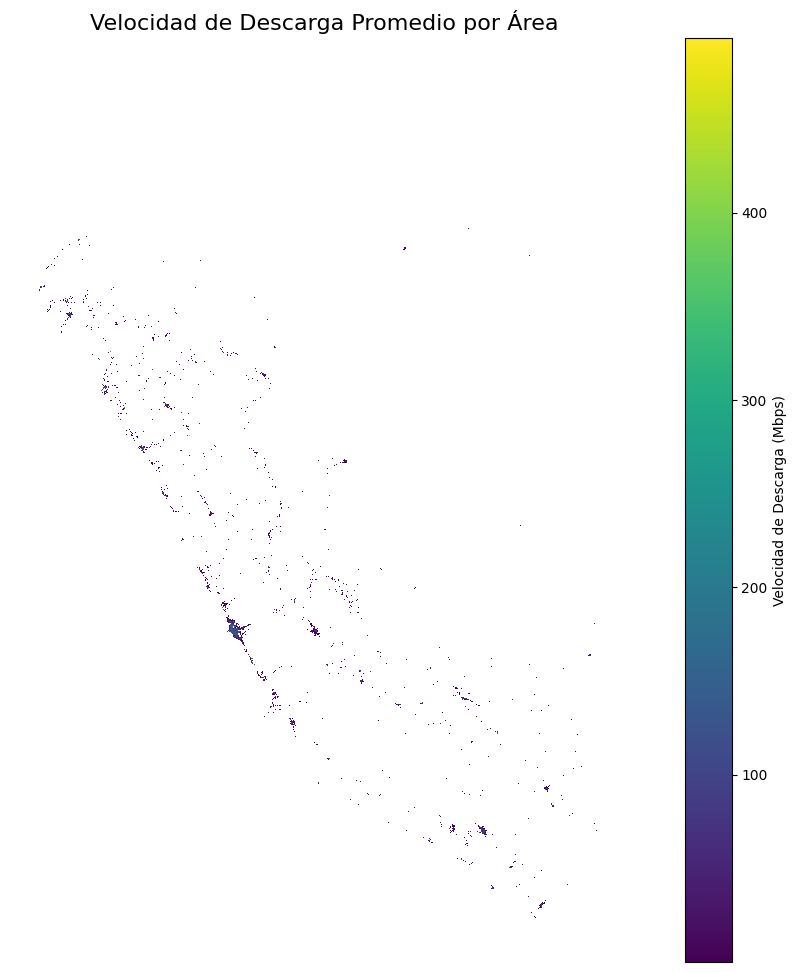

In [ ]:
# Crear el mapa
fig, ax = plt.subplots(figsize=(12, 12))
combined_data.plot(
    column='avg_d_mbps',  # Columna para el mapa temático
    cmap='viridis',       # Paleta de colores
    legend=True,          # Agregar barra de leyenda
    legend_kwds={'label': "Velocidad de Descarga (Mbps)"},  # Etiqueta de la leyenda
    ax=ax
)
ax.set_title("Velocidad de Descarga Promedio por Área", fontsize=16)
ax.axis("off")  # Ocultar ejes
plt.show()


# Análisis por distrito

In [ ]:
# Primero, crea una columna que combine año y trimestre en formato 'YYYYQX'
combined_data['year_quarter'] = combined_data['year'].astype(str) + 'Q' + combined_data['quarter'].astype(str)



In [ ]:
# Luego, convierte esta columna a formato de fecha
# Para esto, vamos a definir una función que convierta 'YYYYQX' a una fecha correspondiente al inicio del trimestre
def convert_to_date(year_quarter):
    year, quarter = int(year_quarter[:4]), int(year_quarter[5])
    if quarter == 1:
        return pd.Timestamp(year, 1, 1)
    elif quarter == 2:
        return pd.Timestamp(year, 4, 1)
    elif quarter == 3:
        return pd.Timestamp(year, 7, 1)
    elif quarter == 4:
        return pd.Timestamp(year, 10, 1)

combined_data['year_quarter_date'] = combined_data['year_quarter'].apply(convert_to_date)


In [ ]:

# Ahora, calcula las estadísticas agregadas por trimestre
stats_by_quarter = combined_data.groupby('year_quarter_date').agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

# Renombra las columnas para mayor claridad
stats_by_quarter.columns = ['Year_Quarter', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Muestra las estadísticas por trimestre
print(stats_by_quarter)

   Year_Quarter  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  Total_Tests  \
0    2019-01-01             19282.207756            4848.639620       171002   
1    2019-04-01             20139.329849            5043.956155       176792   
2    2019-07-01             18936.205631            4559.767623       271843   
3    2019-10-01             17875.922816            4912.056520       535575   
4    2020-01-01             23682.112317            5579.675053       172909   
5    2020-04-01             21144.704562            4735.093642       291008   
6    2020-07-01             28486.484817            8312.903330       308016   
7    2020-10-01             38660.482718           17954.650839       159734   
8    2021-01-01             42956.098091           23419.576738       241995   
9    2021-04-01             48736.882252           23811.266219       207975   
10   2021-07-01             30800.954794           19234.435697       856872   
11   2021-10-01             55027.597715

In [ ]:
stats_by_quarter.describe()

Year_Quarter  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  \
count                   16                16.000000              16.000000   
mean   2020-11-15 04:30:00             32965.647092           17820.074951   
min    2019-01-01 00:00:00             17875.922816            4559.767623   
25%    2019-12-09 00:00:00             20893.360884            5010.981247   
50%    2020-11-16 00:00:00             33454.494440           18594.543268   
75%    2021-10-24 00:00:00             40938.328764           26724.467496   
max    2022-10-01 00:00:00             55027.597715           42091.634415   
std                    NaN             12143.489906           12622.212394   

        Total_Tests  Total_Devices  
count      16.00000      16.000000  
mean   395617.81250   93967.000000  
min    156375.00000   33471.000000  
25%    175821.25000   41010.750000  
50%    281425.50000   45834.000000  
75%    679972.75000  177407.500000  
max    856872.00000  193152.000000  
std    251047.85428   67715.723939

In [ ]:
stats_by_quarter.to_excel('output/evolucion_trimestral.xlsx', index = False)

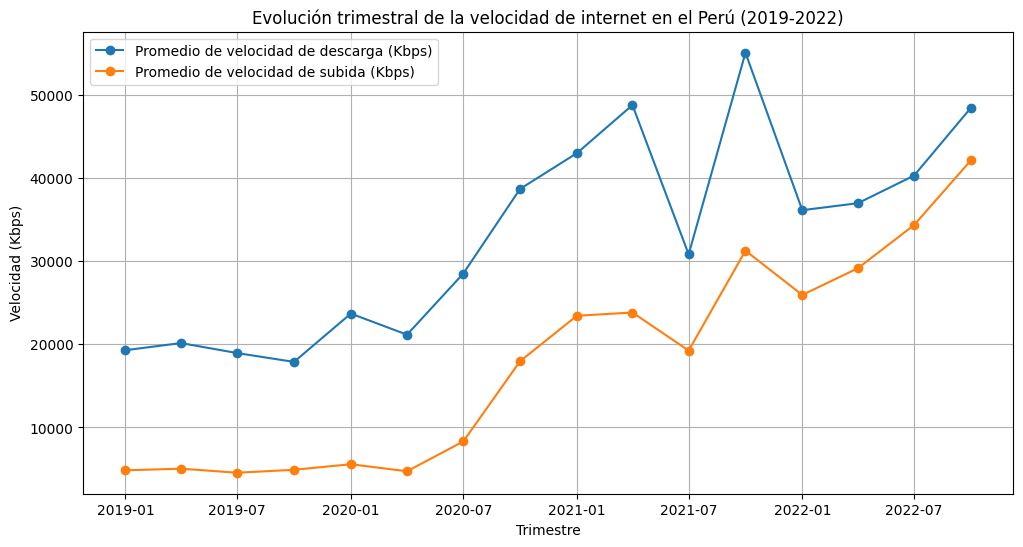

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Download_Speed_Kbps'], label='Promedio de velocidad de descarga (Kbps)', marker='o')
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Upload_Speed_Kbps'], label='Promedio de velocidad de subida (Kbps)', marker='o')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad (Kbps)')
plt.title('Evolución trimestral de la velocidad de internet en el Perú (2019-2022)')
plt.legend()
plt.grid(True)
plt.show()

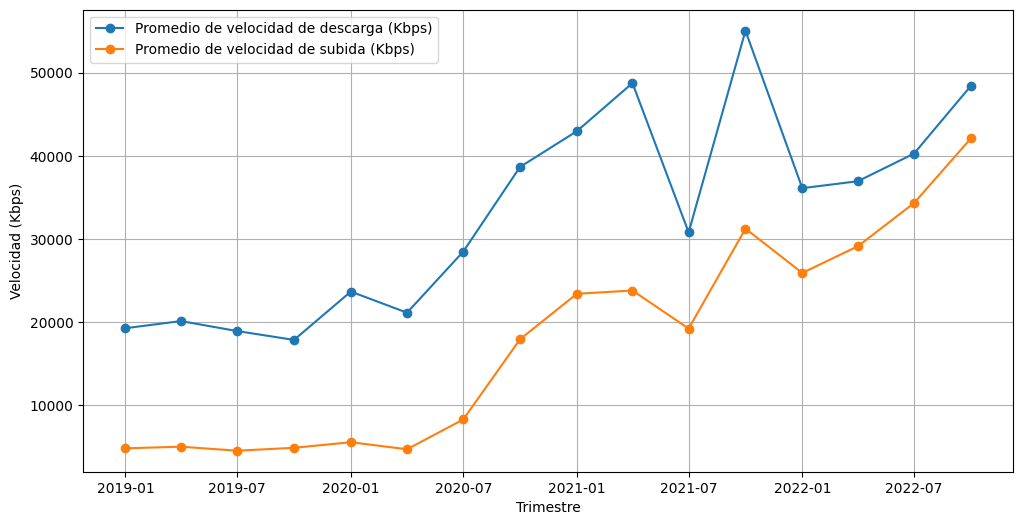

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Download_Speed_Kbps'], label='Promedio de velocidad de descarga (Kbps)', marker='o')
plt.plot(stats_by_quarter['Year_Quarter'], stats_by_quarter['Avg_Upload_Speed_Kbps'], label='Promedio de velocidad de subida (Kbps)', marker='o')
plt.xlabel('Trimestre', fontsize=10)
plt.ylabel('Velocidad (Kbps)', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Guardar el gráfico
plt.savefig('output/grafico_velocidad_internet_peru.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
combined_data.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP  ... DEPARTAMEN PROVINCIA           DISTRITO  \
0        1332  150140   15   01  ...       LIMA      LIMA  SANTIAGO DE SURCO   
1        1332  150140   15   01  ...       LIMA      LIMA  SANTIAGO DE SURCO   
2        1332  150140   15   01  ...       LIMA      LIMA  SANTIAGO DE SURCO   
3        1332  150140   15   01  ...       LIMA      LIMA  SANTIAGO DE SURCO   
4        1332  150140   15   01  ...       LIMA      LIMA  SANTIAGO DE SURCO   

  OBJECTID  ESRI_OID  year  quarter  \
0   1333.0    1333.0  2019        1   
1   1333.0    1333.0  2019        1   
2   1333.0    1333.0  2019        1   
3   1333.0    1333.0  2019        1   
4   1333.0    1333.0  2019        1   

                                            geometry year_quarter  \
0  POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...       2019Q1   
1  POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...       2019Q1   
2  POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...       2019Q1   
3  POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...       2019Q1   
4  POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...       2019Q1   

  year_quarter_date  
0        2019-01-01  
1        2019-01-01  
2        2019-01-01  
3        2019-01-01  
4        2019-01-01  

[5 rows x 21 columns]

ANALISIS POR DEPARTAMENTO Y AÑO

In [ ]:
stats_by_department_year = combined_data.groupby(['DEPARTAMEN', 'year_quarter']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

In [ ]:
stats_by_department_year.columns = ['Department', 'Year', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Muestra las estadísticas por departamento y año
print(stats_by_department_year)

    Department    Year  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  \
0     AMAZONAS  2019Q1              5180.833333            3209.208333   
1     AMAZONAS  2019Q2             11375.525000            4890.275000   
2     AMAZONAS  2019Q3             14170.076923            5900.307692   
3     AMAZONAS  2019Q4             14403.131579            6720.131579   
4     AMAZONAS  2020Q1             11072.750000            4777.083333   
..         ...     ...                      ...                    ...   
395    UCAYALI  2021Q4             53549.239437           40200.211268   
396    UCAYALI  2022Q1             35115.465753           26229.489726   
397    UCAYALI  2022Q2             31146.060317           26012.704762   
398    UCAYALI  2022Q3             31749.331288           27342.438650   
399    UCAYALI  2022Q4             35721.050676           30011.604730   

     Total_Tests  Total_Devices  
0            353             53  
1            287             80  
2        

In [ ]:
stats_by_department_year.to_excel('output/stats_by_department_year.xlsx',index = False)

In [ ]:
# Ordena los departamentos por velocidad de descarga
stats_by_department_sorted_download = stats_by_department_year.sort_values(by='Avg_Download_Speed_Kbps', ascending=False)

# Ordena los departamentos por velocidad de subida
stats_by_department_sorted_upload = stats_by_department_year.sort_values(by='Avg_Upload_Speed_Kbps', ascending=False)

# Muestra los 10 departamentos con la mayor velocidad de descarga
print("Top 10 Departamentos por Velocidad de Descarga:")
print(stats_by_department_sorted_download.head(10))

# Muestra los 10 departamentos con la mayor velocidad de subida
print("\nTop 10 Departamentos por Velocidad de Subida:")
print(stats_by_department_sorted_upload.head(10))

Top 10 Departamentos por Velocidad de Descarga:
    Department    Year  Avg_Download_Speed_Kbps  Avg_Upload_Speed_Kbps  \
111     CALLAO  2022Q4             73842.219298           62024.178363   
239       LIMA  2022Q4             70953.156257           61754.958129   
235       LIMA  2021Q4             65253.732130           36719.253715   
107     CALLAO  2021Q4             65076.506787           30212.778281   
110     CALLAO  2022Q3             63760.488372           52217.066860   
363      TACNA  2021Q4             62573.015385           52529.046154   
238       LIMA  2022Q3             62435.936338           54067.816682   
109     CALLAO  2022Q2             61439.196970           45188.512121   
73    AYACUCHO  2021Q2             58635.808989           50462.325843   
233       LIMA  2021Q2             56782.243270           24424.663676   

     Total_Tests  Total_Devices  
111        30091           7916  
239       405994         112768  
235       116774          26520  
1

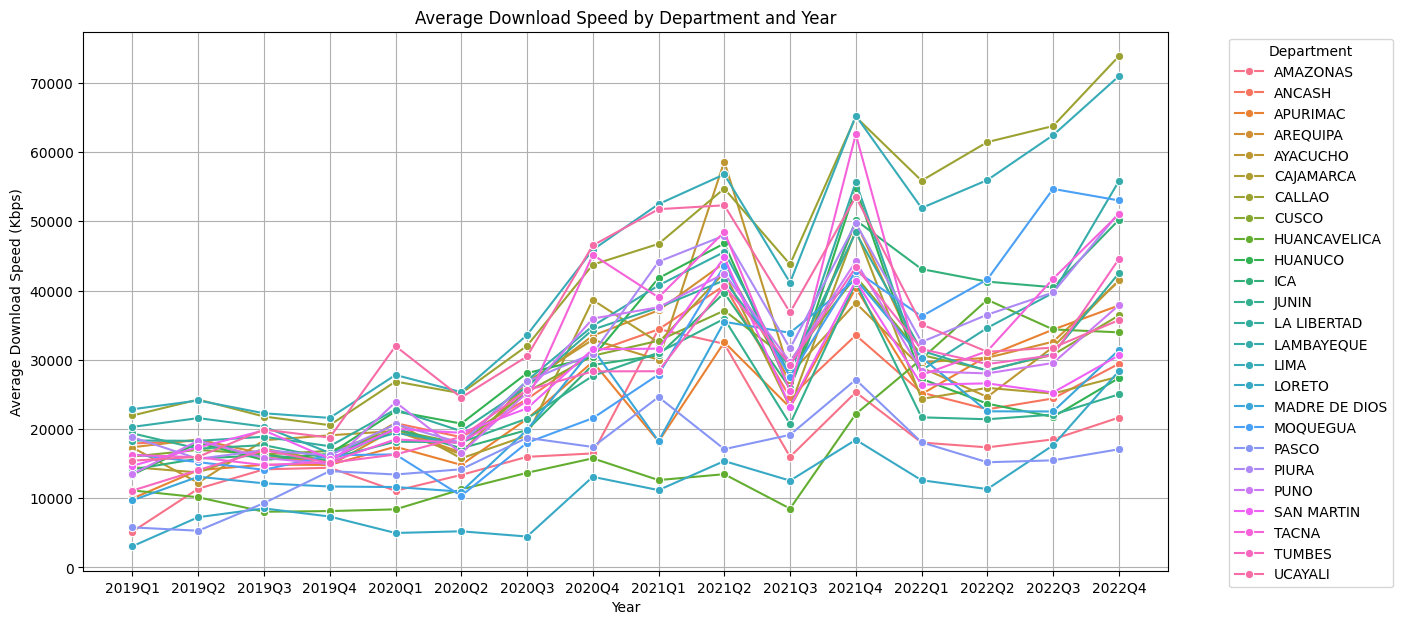

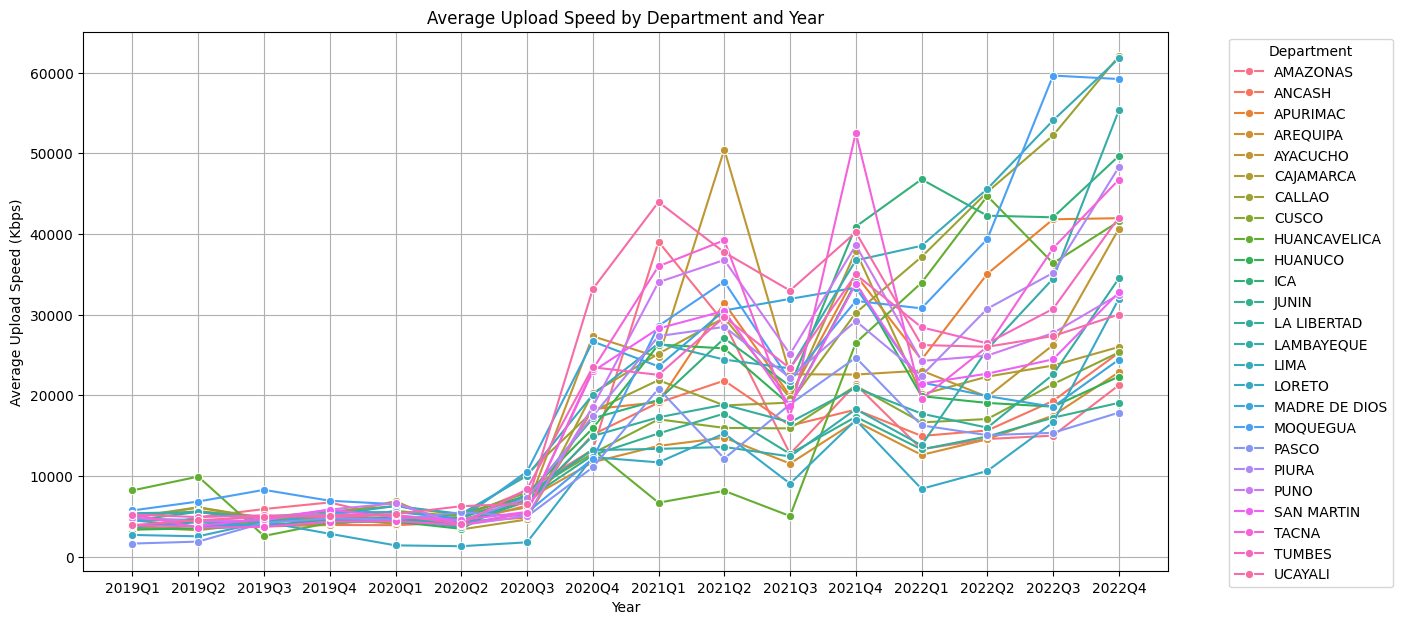

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=stats_by_department_year, x='Year', y='Avg_Download_Speed_Kbps', hue='Department', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Download Speed (Kbps)')
plt.title('Average Download Speed by Department and Year')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=stats_by_department_year, x='Year', y='Avg_Upload_Speed_Kbps', hue='Department', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Upload Speed (Kbps)')
plt.title('Average Upload Speed by Department and Year')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

ANÁLISIS A NIVEL LIMA METROPOLITANA Y DISTRITAL

In [ ]:
lima_metropolitana_data = combined_data[(combined_data['PROVINCIA'] == 'LIMA') | (combined_data['PROVINCIA'] == 'CALLAO')]

In [ ]:
# Especifica el nombre del archivo de salida (GeoJSON)
lima_data = 'output/lima_metropolitana_data.geojson'

# Guardar el archivo en formato GeoJSON
lima_metropolitana_data.to_file(lima_data, driver='GeoJSON')

print(f"Archivo convertido a GeoJSON y guardado como {lima_metropolitana_data}")

Archivo convertido a GeoJSON y guardado como                  quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       2100300121202033       39338        7386          18    478       56   
1       2100300121202222       26534        6529          26    171       40   
2       2100300120331133       23960        4519          16    225       32   
3       2100300120313331       23637        4033          29    235       60   
4       2100300121202231       34316        6107          17    255       42   
...                  ...         ...         ...         ...    ...      ...   
153352  2100300123320132       67994      102462           9      1        1   
153353  2100300123320300       82427       88467           6     37        7   
153354  2100300123320301      144832      184148           4      1        1   
153355  2100300123321011       10798        3021          35     24        1   
153356  2100300123321012       33811       11096          22     41        

In [ ]:
lima_metropolitana_data

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       2100300121202033       39338        7386          18    478       56   
1       2100300121202222       26534        6529          26    171       40   
2       2100300120331133       23960        4519          16    225       32   
3       2100300120313331       23637        4033          29    235       60   
4       2100300121202231       34316        6107          17    255       42   
...                  ...         ...         ...         ...    ...      ...   
153352  2100300123320132       67994      102462           9      1        1   
153353  2100300123320300       82427       88467           6     37        7   
153354  2100300123320301      144832      184148           4      1        1   
153355  2100300123321011       10798        3021          35     24        1   
153356  2100300123321012       33811       11096          22     41        4   

        index_righ  UBIGEO CCDD CCPP CCDI DEPARTAMEN PROVINCIA  \
0             1332  150140   15   01   40       LIMA      LIMA   
1             1332  150140   15   01   40       LIMA      LIMA   
2             1332  150140   15   01   40       LIMA      LIMA   
3             1332  150140   15   01   40       LIMA      LIMA   
4             1332  150140   15   01   40       LIMA      LIMA   
...            ...     ...  ...  ...  ...        ...       ...   
153352        1316  150124   15   01   24       LIMA      LIMA   
153353        1316  150124   15   01   24       LIMA      LIMA   
153354        1316  150124   15   01   24       LIMA      LIMA   
153355        1316  150124   15   01   24       LIMA      LIMA   
153356        1316  150124   15   01   24       LIMA      LIMA   

                 DISTRITO  OBJECTID  ESRI_OID  year  quarter  \
0       SANTIAGO DE SURCO    1333.0    1333.0  2019        1   
1       SANTIAGO DE SURCO    1333.0    1333.0  2019        1   
2       SANTIAGO DE SURCO    1333.0    1333.0  2019        1   
3       SANTIAGO DE SURCO    1333.0    1333.0  2019        1   
4       SANTIAGO DE SURCO    1333.0    1333.0  2019        1   
...                   ...       ...       ...   ...      ...   
153352           PUCUSANA    1317.0    1317.0  2022        4   
153353           PUCUSANA    1317.0    1317.0  2022        4   
153354           PUCUSANA    1317.0    1317.0  2022        4   
153355           PUCUSANA    1317.0    1317.0  2022        4   
153356           PUCUSANA    1317.0    1317.0  2022        4   

                                                 geometry year_quarter  
0       POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...       2019Q1  
1       POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...       2019Q1  
2       POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...       2019Q1  
3       POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...       2019Q1  
4       POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...       2019Q1  
...                                                   ...          ...  
153352  POLYGON ((-76.78345 -12.48485, -76.77795 -12.4...       2022Q4  
153353  POLYGON ((-76.79443 -12.49021, -76.78894 -12.4...       2022Q4  
153354  POLYGON ((-76.78894 -12.49021, -76.78345 -12.4...       2022Q4  
153355  POLYGON ((-76.75598 -12.46876, -76.75049 -12.4...       2022Q4  
153356  POLYGON ((-76.76147 -12.47412, -76.75598 -12.4...       2022Q4  

[48596 rows x 20 columns]

In [ ]:
lima_metropolitana_data['avg_d_mbps'] = lima_metropolitana_data['avg_d_kbps'] / 1000
lima_metropolitana_data['avg_u_mbps'] = lima_metropolitana_data['avg_u_kbps'] / 1000

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
lima_metropolitana_data.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  2100300121202033       39338        7386          18    478       56   
1  2100300121202222       26534        6529          26    171       40   
2  2100300120331133       23960        4519          16    225       32   
3  2100300120313331       23637        4033          29    235       60   
4  2100300121202231       34316        6107          17    255       42   

   index_righ  UBIGEO CCDD CCPP  ... PROVINCIA           DISTRITO OBJECTID  \
0        1332  150140   15   01  ...      LIMA  SANTIAGO DE SURCO   1333.0   
1        1332  150140   15   01  ...      LIMA  SANTIAGO DE SURCO   1333.0   
2        1332  150140   15   01  ...      LIMA  SANTIAGO DE SURCO   1333.0   
3        1332  150140   15   01  ...      LIMA  SANTIAGO DE SURCO   1333.0   
4        1332  150140   15   01  ...      LIMA  SANTIAGO DE SURCO   1333.0   

  ESRI_OID  year  quarter                                           geometry  \
0   1333.0  2019        1  POLYGON ((-76.97571 -12.09841, -76.97021 -12.0...   
1   1333.0  2019        1  POLYGON ((-76.99219 -12.11989, -76.98669 -12.1...   
2   1333.0  2019        1  POLYGON ((-76.99768 -12.14138, -76.99219 -12.1...   
3   1333.0  2019        1  POLYGON ((-76.99768 -12.11452, -76.99219 -12.1...   
4   1333.0  2019        1  POLYGON ((-76.97571 -12.11452, -76.97021 -12.1...   

   year_quarter avg_d_mbps avg_u_mbps  
0        2019Q1     39.338      7.386  
1        2019Q1     26.534      6.529  
2        2019Q1     23.960      4.519  
3        2019Q1     23.637      4.033  
4        2019Q1     34.316      6.107  

[5 rows x 22 columns]

In [ ]:
statistics = lima_metropolitana_data[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests', 'devices']].describe()

In [ ]:
lima_metropolitana_data[['quadkey', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests', 'devices', 'DISTRITO', 'year', 'quarter', 'year_quarter', 'date']].to_csv('lima_metropolitana_data.csv', index=False)

print("Los datos procesados se han guardado en 'lima_metropolitana_data.csv'")

Los datos procesados se han guardado en 'lima_metropolitana_data.csv'


In [ ]:
lima_metropolitana_data = pd.read_csv('lima_metropolitana_data.csv')

In [ ]:
# Consolidar año y trimestre en una sola columna (year_quarter)
lima_metropolitana_data['year_quarter'] = lima_metropolitana_data['year'].astype(str) + 'Q' + lima_metropolitana_data['quarter'].astype(str)

# Verifica las primeras filas para asegurarte de que la nueva columna se creó correctamente
print(lima_metropolitana_data[['year', 'quarter', 'year_quarter']].head())


   year  quarter year_quarter
0  2019        1       2019Q1
1  2019        1       2019Q1
2  2019        1       2019Q1
3  2019        1       2019Q1
4  2019        1       2019Q1


In [ ]:
# Generar estadísticas descriptivas de las variables principales
eda_summary = lima_metropolitana_data[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests', 'devices']].describe()

# Mostrar las estadísticas descriptivas
print(eda_summary)

         avg_d_mbps    avg_u_mbps    avg_lat_ms         tests       devices
count  48596.000000  48596.000000  48596.000000  48596.000000  48596.000000
mean      48.232978     27.548818     19.559758     87.044798     20.347127
std       35.545742     33.351016     53.718823    129.451786     28.510380
min        0.035000      0.001000      0.000000      1.000000      1.000000
25%       22.372750      4.950000      9.000000      7.000000      3.000000
50%       36.975000     14.936500     12.000000     33.000000      8.000000
75%       68.635000     33.047000     18.000000    114.000000     26.000000
max      493.191000    340.160000   4929.000000   3729.000000    285.000000


In [ ]:
# Detectar outliers en la velocidad de descarga (percentil 99)
outliers_download = lima_metropolitana_data[lima_metropolitana_data['avg_d_mbps'] > lima_metropolitana_data['avg_d_mbps'].quantile(0.99)]
print(outliers_download[['quadkey', 'avg_d_mbps', 'DISTRITO', 'year_quarter']].head())

# Detectar outliers en la velocidad de carga (percentil 99)
outliers_upload = lima_metropolitana_data[lima_metropolitana_data['avg_u_mbps'] > lima_metropolitana_data['avg_u_mbps'].quantile(0.99)]
print(outliers_upload[['quadkey', 'avg_u_mbps', 'DISTRITO', 'year_quarter']].head())

                quadkey  avg_d_mbps     DISTRITO year_quarter
3458   2100300120301313     148.171   SAN MIGUEL       2019Q2
12042  2100300102320122     206.686        ANCON       2020Q1
12054  2100300102320122     206.686   SANTA ROSA       2020Q1
13414  2100300121200122     164.763          ATE       2020Q1
14039  2100300121200122     164.763  SANTA ANITA       2020Q1
                quadkey  avg_u_mbps                DISTRITO year_quarter
3458   2100300120301313     266.041              SAN MIGUEL       2019Q2
21313  2100300120301313     338.181              SAN MIGUEL       2020Q4
23226  2100300120130211     137.900              LOS OLIVOS       2021Q1
23477  2100300120130211     137.900                   COMAS       2021Q1
23638  2100300121022301     173.604  SAN JUAN DE LURIGANCHO       2021Q1


In [ ]:
# Agrupar por distrito y calcular la media de las velocidades
mean_speeds_by_district = lima_metropolitana_data.groupby('DISTRITO')[['avg_d_mbps', 'avg_u_mbps']].mean().reset_index()

# Mostrar la media de velocidades por distrito
print(mean_speeds_by_district)

                      DISTRITO  avg_d_mbps  avg_u_mbps
0                        ANCON   33.336280   14.769324
1                          ATE   42.304402   24.081148
2                     BARRANCO   63.848739   27.667794
3                   BELLAVISTA   53.441843   27.138545
4                        BREÑA   59.711802   36.331559
5                       CALLAO   46.855959   26.309422
6                   CARABAYLLO   36.108163   23.060770
7   CARMEN DE LA LEGUA REYNOSO   53.421305   34.035021
8                   CHACLACAYO   40.399550   16.263044
9                   CHORRILLOS   55.590105   32.221177
10                 CIENEGUILLA   21.965853   10.871786
11                       COMAS   46.654529   26.390274
12                 EL AGUSTINO   51.449075   32.796446
13               INDEPENDENCIA   52.977211   32.079298
14                 JESUS MARIA   63.353599   38.581469
15                   LA MOLINA   71.076982   41.769347
16                    LA PERLA   55.617351   32.974668
17        

In [ ]:
# Estadísticas descriptivas del número de tests por grilla
tests_summary = lima_metropolitana_data['tests'].describe()

# Mostrar estadísticas descriptivas de los tests
print(tests_summary)

count    48596.000000
mean        87.044798
std        129.451786
min          1.000000
25%          7.000000
50%         33.000000
75%        114.000000
max       3729.000000
Name: tests, dtype: float64


In [ ]:

# Función para convertir year_quarter en formato de fecha
def convert_to_date(row):
    quarter_start_month = {
        1: "01",  # Q1 -> Enero
        2: "04",  # Q2 -> Abril
        3: "07",  # Q3 -> Julio
        4: "10"   # Q4 -> Octubre
    }
    # Crear la fecha en formato yyyy-mm-dd, el día siempre será 01
    return f"{row['year']}-{quarter_start_month[row['quarter']]}-01"

# Aplicar la función para convertir la columna 'year_quarter' en un formato de fecha
lima_metropolitana_data['date'] = lima_metropolitana_data.apply(convert_to_date, axis=1)

# Verificar las primeras filas con la nueva columna de fechas
print(lima_metropolitana_data[['year_quarter', 'date']].head())

  year_quarter        date
0       2019Q1  2019-01-01
1       2019Q1  2019-01-01
2       2019Q1  2019-01-01
3       2019Q1  2019-01-01
4       2019Q1  2019-01-01


In [ ]:
lima_metropolitana_data

quadkey  avg_d_mbps  avg_u_mbps  avg_lat_ms  tests  devices  \
0      2100300121202033      39.338       7.386          18    478       56   
1      2100300121202222      26.534       6.529          26    171       40   
2      2100300120331133      23.960       4.519          16    225       32   
3      2100300120313331      23.637       4.033          29    235       60   
4      2100300121202231      34.316       6.107          17    255       42   
...                 ...         ...         ...         ...    ...      ...   
48591  2100300123320132      67.994     102.462           9      1        1   
48592  2100300123320300      82.427      88.467           6     37        7   
48593  2100300123320301     144.832     184.148           4      1        1   
48594  2100300123321011      10.798       3.021          35     24        1   
48595  2100300123321012      33.811      11.096          22     41        4   

                DISTRITO  year  quarter year_quarter        date  
0      SANTIAGO DE SURCO  2019        1       2019Q1  2019-01-01  
1      SANTIAGO DE SURCO  2019        1       2019Q1  2019-01-01  
2      SANTIAGO DE SURCO  2019        1       2019Q1  2019-01-01  
3      SANTIAGO DE SURCO  2019        1       2019Q1  2019-01-01  
4      SANTIAGO DE SURCO  2019        1       2019Q1  2019-01-01  
...                  ...   ...      ...          ...         ...  
48591           PUCUSANA  2022        4       2022Q4  2022-10-01  
48592           PUCUSANA  2022        4       2022Q4  2022-10-01  
48593           PUCUSANA  2022        4       2022Q4  2022-10-01  
48594           PUCUSANA  2022        4       2022Q4  2022-10-01  
48595           PUCUSANA  2022        4       2022Q4  2022-10-01  

[48596 rows x 11 columns]

In [ ]:
lima_metropolitana_data['date'] = pd.PeriodIndex(lima_metropolitana_data['date'], freq='Q')

In [ ]:
unique_quadkeys = lima_metropolitana_data['quadkey'].unique()
all_dates = pd.period_range('2019Q1', '2022Q4', freq='Q')

In [ ]:
# Crear un DataFrame con todas las combinaciones posibles de 'quadkey' y 'date'
all_combinations = pd.MultiIndex.from_product([unique_quadkeys, all_dates], names=['quadkey', 'date']).to_frame(index=False)
all_combinations

quadkey    date
0      2100300121202033  2019Q1
1      2100300121202033  2019Q2
2      2100300121202033  2019Q3
3      2100300121202033  2019Q4
4      2100300121202033  2020Q1
...                 ...     ...
54459  2100300123320132  2021Q4
54460  2100300123320132  2022Q1
54461  2100300123320132  2022Q2
54462  2100300123320132  2022Q3
54463  2100300123320132  2022Q4

[54464 rows x 2 columns]

In [ ]:
# Paso 3: Identificar las combinaciones presentes en los datos
observed_combinations = lima_metropolitana_data[['quadkey', 'date']].drop_duplicates()
observed_combinations

quadkey    date
0      2100300121202033  2019Q1
1      2100300121202222  2019Q1
2      2100300120331133  2019Q1
3      2100300120313331  2019Q1
4      2100300121202231  2019Q1
...                 ...     ...
48591  2100300123320132  2022Q4
48592  2100300123320300  2022Q4
48593  2100300123320301  2022Q4
48594  2100300123321011  2022Q4
48595  2100300123321012  2022Q4

[36912 rows x 2 columns]

In [ ]:
# Realizar un 'outer join' para encontrar las combinaciones faltantes
missing_combinations = pd.merge(all_combinations, observed_combinations, on=['quadkey', 'date'], how='left', indicator=True)

In [ ]:
# Filtrar las combinaciones que no están presentes en los datos originales
missing_data = missing_combinations[missing_combinations['_merge'] == 'left_only']

In [ ]:
# Paso 4: Contar cuántas combinaciones faltan
missing_count = len(missing_data)

In [ ]:
# Imprimir el resultado
print(f"Número de combinaciones de 'quadkey' y 'date' faltantes: {missing_count}")

# Verificar si el panel está balanceado
is_balanced = missing_count == 0
print(f"El panel está balanceado: {is_balanced}")

Número de combinaciones de 'quadkey' y 'date' faltantes: 17552
El panel está balanceado: False


In [ ]:
# Paso 1: Asegurarnos de que la columna 'date' esté en formato de periodo trimestral
lima_metropolitana_data['date'] = pd.PeriodIndex(lima_metropolitana_data['date'], freq='Q')

# Paso 2: Contar cuántas observaciones tiene cada 'quadkey' en el rango completo de trimestres
periodo_completo = pd.period_range('2019Q1', '2022Q4', freq='Q')
observaciones_por_quadkey = lima_metropolitana_data.groupby('quadkey')['date'].nunique()

# Paso 3: Filtrar los 'quadkey' que tienen observaciones en todos los trimestres
quadkeys_completos = observaciones_por_quadkey[observaciones_por_quadkey == len(periodo_completo)].index

# Paso 4: Filtrar el DataFrame original para quedarnos solo con esos 'quadkey'
lima_metropolitana_data_filtrado = lima_metropolitana_data[lima_metropolitana_data['quadkey'].isin(quadkeys_completos)]

# Mostrar el número de observaciones después del filtrado
print(f"Número de observaciones tras filtrar los 'quadkey' completos: {len(lima_metropolitana_data_filtrado)}")

# (Opcional) Guardar el nuevo conjunto de datos en un archivo CSV
# lima_metropolitana_data_filtrado.to_csv('lima_metropolitana_data_filtrado.csv', index=False)

Número de observaciones tras filtrar los 'quadkey' completos: 29264


In [ ]:
def verificar_balanceado(df, id_col, time_col, start_period, end_period, freq='Q'):
    """
    Verifica si un panel de datos está balanceado.

    :param df: DataFrame con los datos a verificar.
    :param id_col: Nombre de la columna que identifica las entidades (ej. 'quadkey').
    :param time_col: Nombre de la columna que contiene el tiempo (ej. 'date').
    :param start_period: Periodo inicial en formato 'YYYYQX' (ej. '2019Q1').
    :param end_period: Periodo final en formato 'YYYYQX' (ej. '2022Q4').
    :param freq: Frecuencia del periodo, por defecto 'Q' (trimestral).
    :return: True si el panel está balanceado, False si no lo está.
    """
    # Asegurarnos de que la columna de tiempo esté en formato de periodo
    df[time_col] = pd.PeriodIndex(df[time_col], freq=freq)

    # Generar todas las combinaciones posibles de identificador y tiempo
    unique_ids = df[id_col].unique()
    all_periods = pd.period_range(start_period, end_period, freq=freq)

    # Crear un DataFrame con todas las combinaciones posibles de id_col y time_col
    all_combinations = pd.MultiIndex.from_product([unique_ids, all_periods], names=[id_col, time_col]).to_frame(index=False)

    # Identificar las combinaciones presentes en los datos
    observed_combinations = df[[id_col, time_col]].drop_duplicates()

    # Realizar un 'outer join' para encontrar las combinaciones faltantes
    missing_combinations = pd.merge(all_combinations, observed_combinations, on=[id_col, time_col], how='left', indicator=True)

    # Filtrar las combinaciones que no están presentes en los datos originales
    missing_data = missing_combinations[missing_combinations['_merge'] == 'left_only']

    # Contar cuántas combinaciones faltan
    missing_count = len(missing_data)

    # Verificar si el panel está balanceado
    is_balanced = missing_count == 0
    return is_balanced, missing_count

# Ejemplo de uso
is_balanced, missing_count = verificar_balanceado(lima_metropolitana_data_filtrado, 'quadkey', 'date', '2019Q1', '2022Q4')
print(f"El panel está balanceado: {is_balanced}")
print(f"Número de combinaciones faltantes: {missing_count}")

El panel está balanceado: True
Número de combinaciones faltantes: 0


<ipython-input-25-441b1e4b7303>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.PeriodIndex(df[time_col], freq=freq)


In [ ]:
lima_metropolitana_data_filtrado.reset_index(drop=True, inplace=True)

In [ ]:
lima_metropolitana_data_filtrado

quadkey  avg_d_mbps  avg_u_mbps  avg_lat_ms  tests  devices  \
0      2100300121202033      39.338       7.386          18    478       56   
1      2100300121202222      26.534       6.529          26    171       40   
2      2100300120331133      23.960       4.519          16    225       32   
3      2100300120313331      23.637       4.033          29    235       60   
4      2100300121202231      34.316       6.107          17    255       42   
...                 ...         ...         ...         ...    ...      ...   
29259  2100300123300133      87.799      26.176          11     35       18   
29260  2100300123300311      77.199      23.469          11     17        5   
29261  2100300123300312      81.842      24.423          11     21        7   
29262  2100300123300313      59.019      24.519           9      9        5   
29263  2100300123320031      75.504      84.549           5     42       12   

                  DISTRITO  year  quarter year_quarter    date  
0        SANTIAGO DE SURCO  2019        1       2019Q1  2019Q1  
1        SANTIAGO DE SURCO  2019        1       2019Q1  2019Q1  
2        SANTIAGO DE SURCO  2019        1       2019Q1  2019Q1  
3        SANTIAGO DE SURCO  2019        1       2019Q1  2019Q1  
4        SANTIAGO DE SURCO  2019        1       2019Q1  2019Q1  
...                    ...   ...      ...          ...     ...  
29259  SANTA MARIA DEL MAR  2022        4       2022Q4  2022Q4  
29260  SANTA MARIA DEL MAR  2022        4       2022Q4  2022Q4  
29261  SANTA MARIA DEL MAR  2022        4       2022Q4  2022Q4  
29262  SANTA MARIA DEL MAR  2022        4       2022Q4  2022Q4  
29263             PUCUSANA  2022        4       2022Q4  2022Q4  

[29264 rows x 11 columns]

In [ ]:
# Contar la cantidad de quadkeys únicos en el dataset
num_quadkeys_unicos = lima_metropolitana_data_filtrado['quadkey'].nunique()

# Mostrar el número de quadkeys únicos
print(f"Número de quadkeys únicos: {num_quadkeys_unicos}")

Número de quadkeys únicos: 1326


In [ ]:
distritos_unicos = lima_metropolitana_data['DISTRITO'].unique()
print("Distritos únicos en el DataFrame:")
print(distritos_unicos)

Distritos únicos en el DataFrame:
['SANTIAGO DE SURCO' 'CALLAO' 'SAN MARTIN DE PORRES' 'SAN BORJA'
 'JESUS MARIA' 'LIMA' 'SAN ISIDRO' 'LINCE' 'VENTANILLA' 'PUENTE PIEDRA'
 'MIRAFLORES' 'SURQUILLO' 'SAN JUAN DE LURIGANCHO' 'INDEPENDENCIA'
 'LOS OLIVOS' 'CHORRILLOS' 'LA VICTORIA' 'SAN LUIS' 'PUEBLO LIBRE' 'BREÑA'
 'ATE' 'MAGDALENA DEL MAR' 'LA MOLINA' 'SAN MIGUEL' 'BELLAVISTA'
 'EL AGUSTINO' 'COMAS' 'BARRANCO' 'SAN JUAN DE MIRAFLORES'
 'VILLA EL SALVADOR' 'LA PERLA' 'SANTA ANITA' 'SANTA MARIA DEL MAR'
 'SAN BARTOLO' 'CARABAYLLO' 'PUNTA NEGRA' 'RIMAC' 'LURIGANCHO'
 'CHACLACAYO' 'LURIN' 'PACHACAMAC' 'VILLA MARIA DEL TRIUNFO'
 'PUNTA HERMOSA' 'CARMEN DE LA LEGUA REYNOSO' 'CIENEGUILLA' 'LA PUNTA'
 'ANCON' 'PUCUSANA' 'MI PERU' 'SANTA ROSA']


In [ ]:
# Contar la cantidad de quadkeys únicos por cada distrito
quadkeys_por_distrito = lima_metropolitana_data_filtrado.groupby('DISTRITO')['quadkey'].nunique()

# Mostrar el número de quadkeys únicos por distrito
print(quadkeys_por_distrito)


DISTRITO
ANCON                           4
ATE                            91
BARRANCO                       15
BELLAVISTA                     25
BREÑA                          18
CALLAO                         74
CARABAYLLO                     22
CARMEN DE LA LEGUA REYNOSO      9
CHACLACAYO                     25
CHORRILLOS                     72
CIENEGUILLA                     7
COMAS                          66
EL AGUSTINO                    43
INDEPENDENCIA                  30
JESUS MARIA                    22
LA MOLINA                      99
LA PERLA                       16
LA PUNTA                        3
LA VICTORIA                    38
LIMA                           89
LINCE                          16
LOS OLIVOS                     66
LURIGANCHO                     34
LURIN                          17
MAGDALENA DEL MAR              18
MI PERU                         3
MIRAFLORES                     44
PACHACAMAC                     10
PUCUSANA                        1
PUEBL

In [ ]:
lima_metropolitana_data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   quadkey       29264 non-null  int64        
 1   avg_d_mbps    29264 non-null  float64      
 2   avg_u_mbps    29264 non-null  float64      
 3   avg_lat_ms    29264 non-null  int64        
 4   tests         29264 non-null  int64        
 5   devices       29264 non-null  int64        
 6   DISTRITO      29264 non-null  object       
 7   year          29264 non-null  int64        
 8   quarter       29264 non-null  int64        
 9   year_quarter  29264 non-null  object       
 10  date          29264 non-null  period[Q-DEC]
dtypes: float64(2), int64(6), object(2), period[Q-DEC](1)
memory usage: 2.5+ MB


In [ ]:
fechas_win = pd.DataFrame({
    'Fecha_Entrada': ['2019Q3', '2019Q3', '2020Q3', '2020Q3', '2020Q3', '2020Q4', '2020Q4', '2020Q4',
             '2020Q4', '2020Q4', '2020Q4', '2020Q4', '2020Q4', '2021Q1', '2021Q1', '2021Q1',
             '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q2', '2021Q2',
             '2021Q2', '2021Q2', '2021Q2', '2021Q2', '2021Q3', '2021Q3', '2021Q3', '2021Q4'],
    'DISTRITO': ['SAN MIGUEL', 'PUEBLO LIBRE', 'JESUS MARIA', 'MAGADALENA DEL MAR', 'SURQUILLO',
                 'SAN ISIDRO', 'MIRAFLORES', 'SANTIAGO DE SURCO', 'LA MOLINA', 'CHORRILLOS',
                 'EL AGUSTINO', 'SAN JUAN DE LURIGANCHO', 'SAN MARTIN DE PORRES', 'SAN BORJA',
                 'BREÑA', 'LA VICTORIA', 'BARRANCO', 'LINCE', 'LIMA', 'INDEPENDENCIA',
                 'RIMAC', 'CHORRILLOS', 'ATE', 'VILLA EL SALVADOR', 'COMAS', 'LOS OLIVOS',
                 'CARABAYLLO', 'PUENTE PIEDRA', 'LA VICTORIA', 'SANTA ANITA', 'SAN LUIS',
                 'LURIGANCHO']
})

# Asegurar que la columna 'date' esté en formato de periodo trimestral
fechas_win['Fecha_Entrada'] = pd.PeriodIndex(fechas_win['Fecha_Entrada'], freq='Q')

In [ ]:
fechas_win

Fecha_Entrada                DISTRITO
0         2019Q3              SAN MIGUEL
1         2019Q3            PUEBLO LIBRE
2         2020Q3             JESUS MARIA
3         2020Q3      MAGADALENA DEL MAR
4         2020Q3               SURQUILLO
5         2020Q4              SAN ISIDRO
6         2020Q4              MIRAFLORES
7         2020Q4       SANTIAGO DE SURCO
8         2020Q4               LA MOLINA
9         2020Q4              CHORRILLOS
10        2020Q4             EL AGUSTINO
11        2020Q4  SAN JUAN DE LURIGANCHO
12        2020Q4    SAN MARTIN DE PORRES
13        2021Q1               SAN BORJA
14        2021Q1                   BREÑA
15        2021Q1             LA VICTORIA
16        2021Q1                BARRANCO
17        2021Q1                   LINCE
18        2021Q1                    LIMA
19        2021Q1           INDEPENDENCIA
20        2021Q1                   RIMAC
21        2021Q1              CHORRILLOS
22        2021Q2                     ATE
23        2021Q2       VILLA EL SALVADOR
24        2021Q2                   COMAS
25        2021Q2              LOS OLIVOS
26        2021Q2              CARABAYLLO
27        2021Q2           PUENTE PIEDRA
28        2021Q3             LA VICTORIA
29        2021Q3             SANTA ANITA
30        2021Q3                SAN LUIS
31        2021Q4              LURIGANCHO

In [ ]:
fechas_win['Fecha_Entrada'] = pd.PeriodIndex(fechas_win['Fecha_Entrada'], freq='Q')
lima_metropolitana_data_filtrado['date'] = pd.PeriodIndex(lima_metropolitana_data_filtrado['date'], freq='Q')

<ipython-input-32-feff185d9a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lima_metropolitana_data_filtrado['date'] = pd.PeriodIndex(lima_metropolitana_data_filtrado['date'], freq='Q')


In [ ]:
lima_metropolitana_data_filtrado = pd.merge(lima_metropolitana_data_filtrado, fechas_win, on='DISTRITO', how='left')

In [ ]:
lima_metropolitana_data_filtrado['post'] = (lima_metropolitana_data_filtrado['date'] >= lima_metropolitana_data_filtrado['Fecha_Entrada']).astype(int)

# lima_data_balanceado

In [ ]:
lima_metropolitana_data_filtrado.to_csv('lima_metropolitana_data_filtrado.csv')

In [ ]:
import numpy as np

In [ ]:
import numpy as np
from numpy import ndarray

In [ ]:
# Contar la cantidad de observaciones por cada combinación de quadkey y date
obs_counts = lima_metropolitana_data.groupby(['quadkey', 'date']).size().reset_index(name='counts')

# Verificar cuántos quadkeys y fechas únicas existen
unique_quadkeys = lima_metropolitana_data['quadkey'].nunique()
unique_dates = lima_metropolitana_data['date'].nunique()

# Calcular el número esperado de observaciones si el panel estuviera completamente balanceado
expected_obs = unique_quadkeys * unique_dates
actual_obs = len(obs_counts)

# El panel está balanceado si el número de observaciones es igual al número esperado
is_balanced = expected_obs == actual_obs

# Imprimir el resultado
print("El panel está balanceado:", is_balanced)


El panel está balanceado: False


In [ ]:
# Generar todas las combinaciones posibles de quadkey y date
unique_quadkeys = lima_metropolitana_data['quadkey'].unique()
unique_dates = lima_metropolitana_data['date'].unique()

# Crear un DataFrame con todas las combinaciones posibles de quadkey y date
all_combinations = pd.MultiIndex.from_product([unique_quadkeys, unique_dates], names=['quadkey', 'date']).to_frame(index=False)

# Identificar las combinaciones presentes en los datos
observed_combinations = lima_metropolitana_data[['quadkey', 'date']].drop_duplicates()

# Realizar un 'outer join' para encontrar las combinaciones faltantes
missing_combinations = pd.merge(all_combinations, observed_combinations, on=['quadkey', 'date'], how='left', indicator=True)

# Filtrar las combinaciones que no están presentes en los datos originales
missing_data = missing_combinations[missing_combinations['_merge'] == 'left_only']

# Contar cuántas combinaciones faltan
missing_count = len(missing_data)

# Imprimir el resultado
print(f"Número de combinaciones de 'quadkey' y 'date' faltantes: {missing_count}")

Número de combinaciones de 'quadkey' y 'date' faltantes: 17552


# Lima Análisis

In [ ]:
grouped_data.to_excel('output/estadisticas_descriptivas.xlsx', index=False)

In [ ]:
stats_by_district = lima_metropolitana_data.groupby(['DISTRITO', 'year_quarter']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

In [ ]:
stats_by_district

DISTRITO year_quarter    avg_d_kbps    avg_u_kbps  tests  \
0                      ANCON       2019Q1  20368.555556   4543.481481    174   
1                      ANCON       2019Q2  16747.954545  12830.000000     99   
2                      ANCON       2019Q3  15343.358974   6242.589744    511   
3                      ANCON       2019Q4  13453.830189   7338.547170   1146   
4                      ANCON       2020Q1  29480.695652   7173.826087    186   
..                       ...          ...           ...           ...    ...   
795  VILLA MARIA DEL TRIUNFO       2021Q4  62892.319588  31928.453608   2237   
796  VILLA MARIA DEL TRIUNFO       2022Q1  58968.847328  42064.045802  12246   
797  VILLA MARIA DEL TRIUNFO       2022Q2  63593.121212  49607.772727  12750   
798  VILLA MARIA DEL TRIUNFO       2022Q3  68203.656489  55841.435115  11826   
799  VILLA MARIA DEL TRIUNFO       2022Q4  77770.007692  70235.007692  10988   

     devices  
0         51  
1         38  
2        157  
3        264  
4         50  
..       ...  
795      405  
796     2700  
797     3052  
798     3010  
799     3024  

[800 rows x 6 columns]

<ipython-input-20-8955ad34debd>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Download_Speed_Kbps', hue='District', marker='o', ci=None)


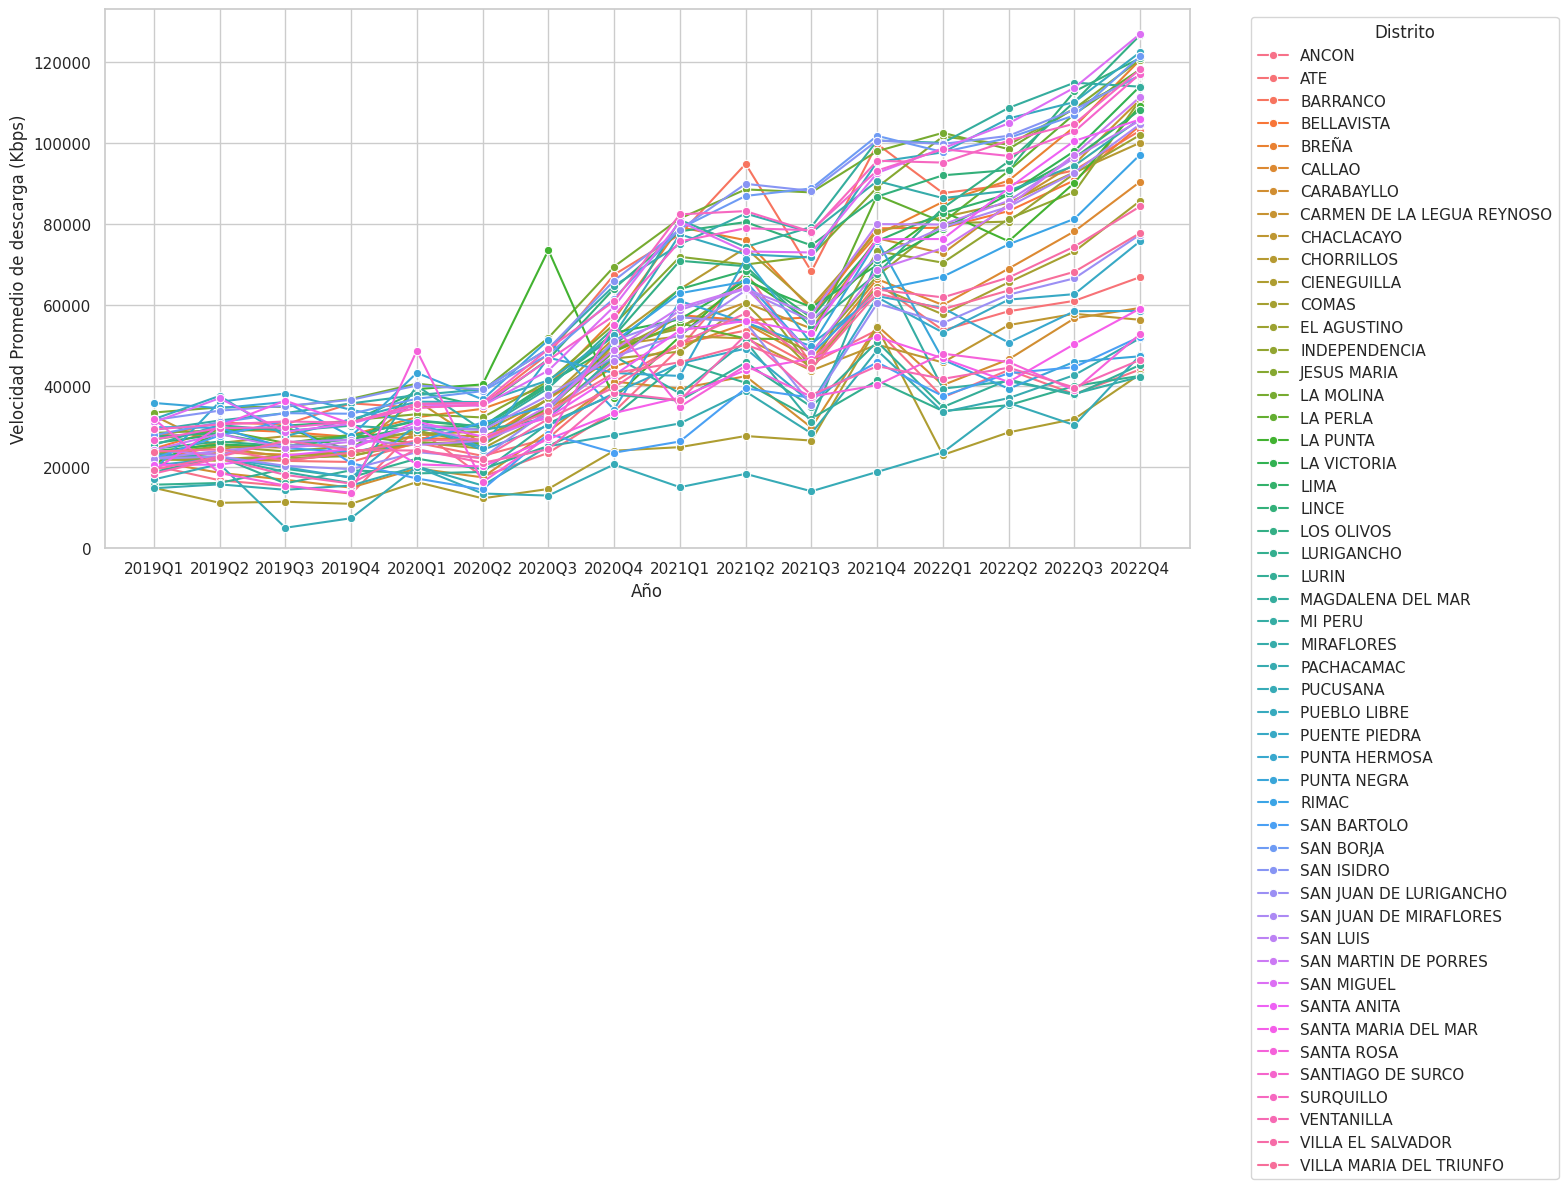

In [ ]:
stats_by_district.columns = ['District', 'year_quarter', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Visualiza la evolución de las velocidades de descarga y subida por distrito y trimestre
import seaborn as sns
import matplotlib.pyplot as plt


# Desactivar el suavizado y ajustar los marcadores
sns.set(style="whitegrid")  # Esto establece un fondo blanco con cuadrícula
plt.figure(figsize=(14, 7))

# Gráfico de velocidades de descarga por distrito
sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Download_Speed_Kbps', hue='District', marker='o', ci=None)
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio de descarga (Kbps)')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(bottom=0)  # Ajusta el límite inferior del eje y si es necesario
plt.savefig('output/grafico_velocidad_internet_lima.png', dpi=300, bbox_inches='tight')
plt.show()


<ipython-input-29-ed951c378e9a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Upload_Speed_Kbps', hue='District', marker='o', ci=None)


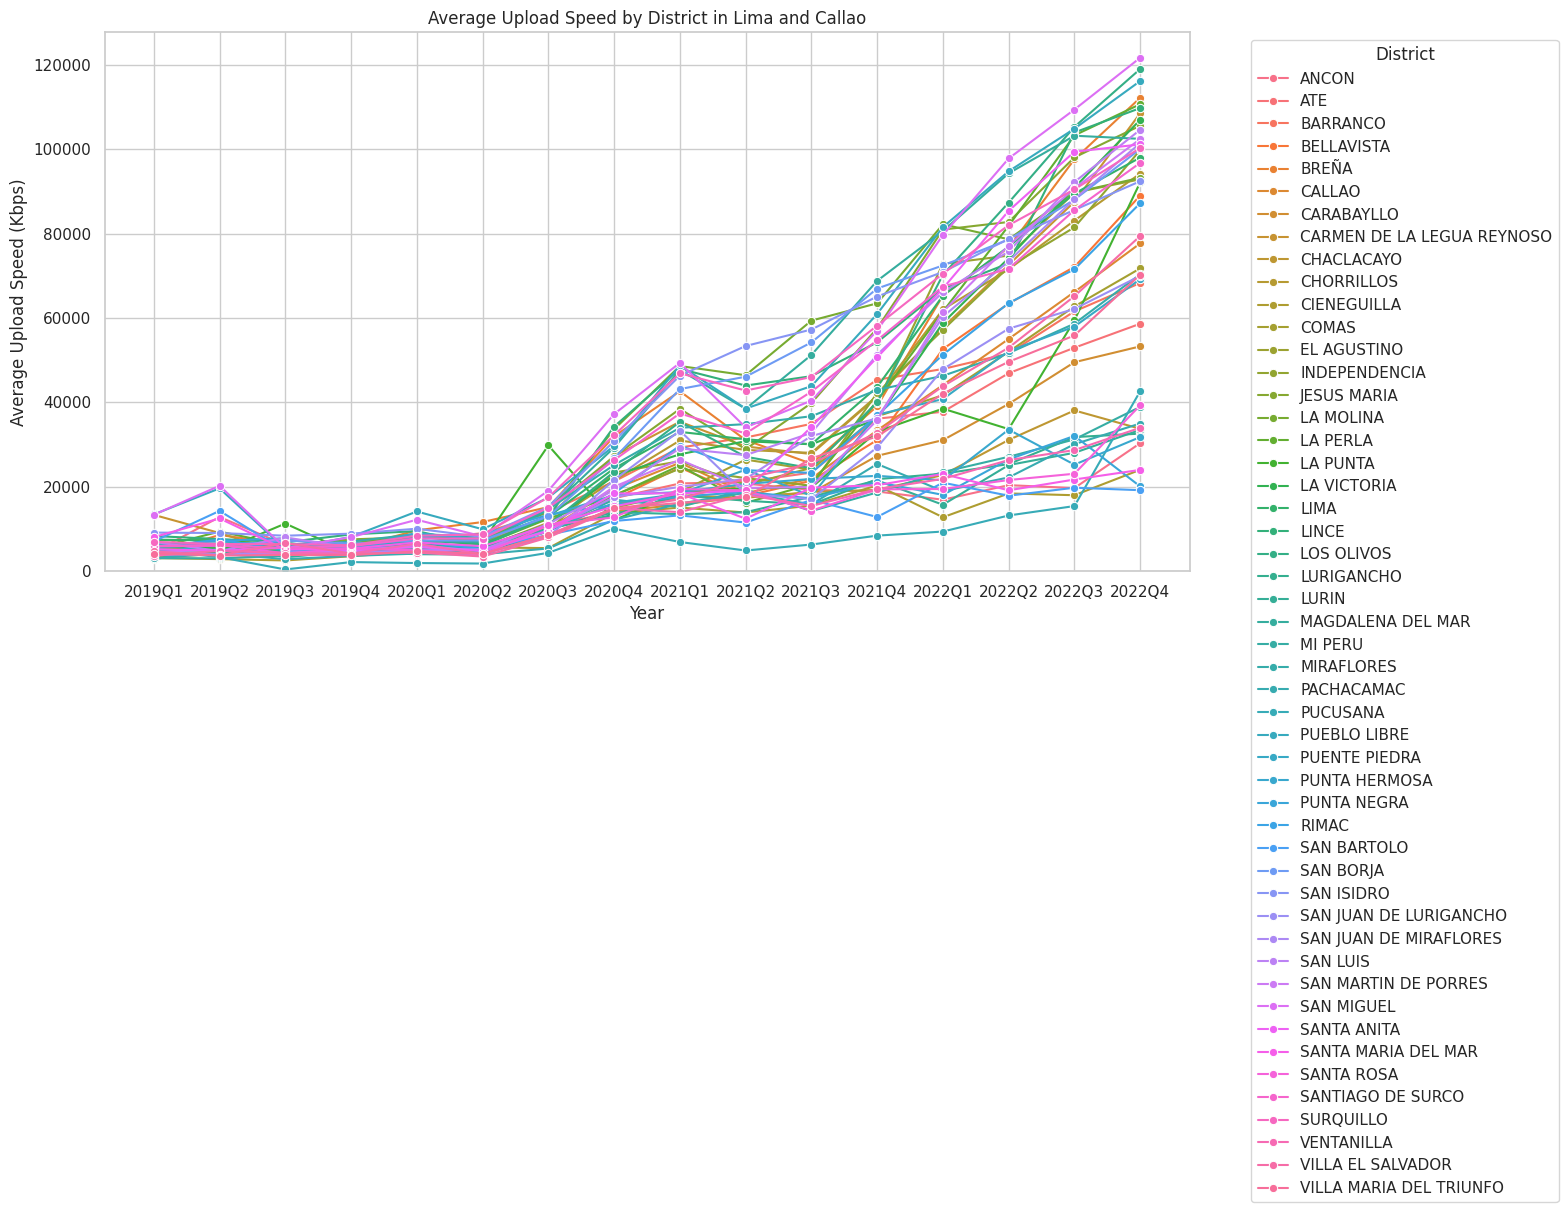

In [ ]:

# Gráfico de velocidades de subida por distrito
plt.figure(figsize=(14, 7))
sns.lineplot(data=stats_by_district, x='year_quarter', y='Avg_Upload_Speed_Kbps', hue='District', marker='o', ci=None)
plt.xlabel('Year')
plt.ylabel('Average Upload Speed (Kbps)')
plt.title('Average Upload Speed by District in Lima and Callao')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(bottom=0)  # Ajusta el límite inferior del eje y si es necesario
plt.show()

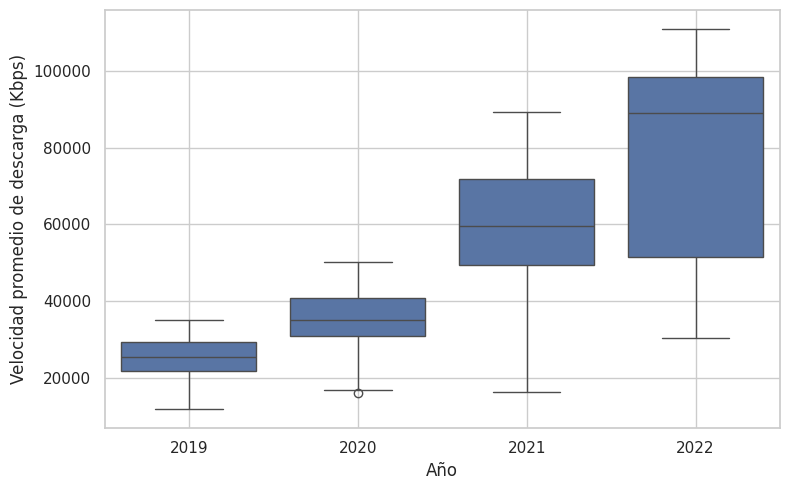

In [ ]:
stats_by_district_year = lima_metropolitana_data.groupby(['DISTRITO', 'year']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
    'tests': 'sum',
    'devices': 'sum'
}).reset_index()

# Renombra las columnas para mayor claridad
stats_by_district_year.columns = ['District', 'Year', 'Avg_Download_Speed_Kbps', 'Avg_Upload_Speed_Kbps', 'Total_Tests', 'Total_Devices']

# Calcula el promedio general y la desviación estándar de las velocidades de descarga y subida
overall_avg_download_speed = stats_by_district_year['Avg_Download_Speed_Kbps'].mean()
overall_avg_upload_speed = stats_by_district_year['Avg_Upload_Speed_Kbps'].mean()

plt.rcParams.update({'font.size': 10})

# Crear y configurar el gráfico
plt.figure(figsize=(8, 5))  # Tamaño del gráfico en pulgadas (ancho, alto)

sns.boxplot(data=stats_by_district_year, x='Year', y='Avg_Download_Speed_Kbps')
plt.xlabel('Año')
plt.ylabel('Velocidad promedio de descarga (Kbps)')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los márgenes para evitar recortes
plt.savefig('output/grafico_velocidad_internet_lima.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
grouped_data = lima_metropolitana_data.groupby(['DISTRITO', 'year', 'quarter']).agg({
    'avg_d_kbps': ['mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'avg_u_kbps': ['mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
}).reset_index()

# Renombrar columnas para mayor claridad
grouped_data.columns = ['District', 'Year', 'Quarter',
                        'Avg_Download_Speed_Mean', 'Avg_Download_Speed_Std', 'Avg_Download_Speed_Min', 'Avg_Download_Speed_Max', 'Avg_Download_Speed_25%', 'Avg_Download_Speed_50%', 'Avg_Download_Speed_75%',
                        'Avg_Upload_Speed_Mean', 'Avg_Upload_Speed_Std', 'Avg_Upload_Speed_Min', 'Avg_Upload_Speed_Max', 'Avg_Upload_Speed_25%', 'Avg_Upload_Speed_50%', 'Avg_Upload_Speed_75%']

# Visualizar algunas estadísticas descriptivas
grouped_data.head()

District  Year  Quarter  Avg_Download_Speed_Mean  Avg_Download_Speed_Std  \
0    ANCON  2019        1             20368.555556            17065.214142   
1    ANCON  2019        2             16747.954545             9187.568710   
2    ANCON  2019        3             15343.358974            10468.576786   
3    ANCON  2019        4             13453.830189             7812.763666   
4    ANCON  2020        1             29480.695652            46070.171227   

   Avg_Download_Speed_Min  Avg_Download_Speed_Max  Avg_Download_Speed_25%  \
0                    1435                   65592                 8322.50   
1                    1441                   35719                11705.75   
2                     827                   36580                 6253.50   
3                     881                   36177                 5505.00   
4                     971                  206686                 4831.50   

   Avg_Download_Speed_50%  Avg_Download_Speed_75%  Avg_Upload_Speed_Mean  \
0                 11976.0                 31064.0            4543.481481   
1                 14457.5                 20959.0           12830.000000   
2                 13303.0                 23406.0            6242.589744   
3                 14374.0                 19070.0            7338.547170   
4                 23006.0                 30756.0            7173.826087   

   Avg_Upload_Speed_Std  Avg_Upload_Speed_Min  Avg_Upload_Speed_Max  \
0           2804.042581                   531                 12708   
1          19091.380014                   767                 55805   
2           7661.019428                   640                 42243   
3           9616.842846                    68                 56764   
4           7904.297845                   286                 37456   

   Avg_Upload_Speed_25%  Avg_Upload_Speed_50%  Avg_Upload_Speed_75%  
0               2692.50                4240.0               5942.00  
1               1383.25                3115.0              10045.75  
2               3409.00                4050.0               5261.50  
3               3461.00                4543.0               6412.00  
4               2230.00                5821.0               9495.00

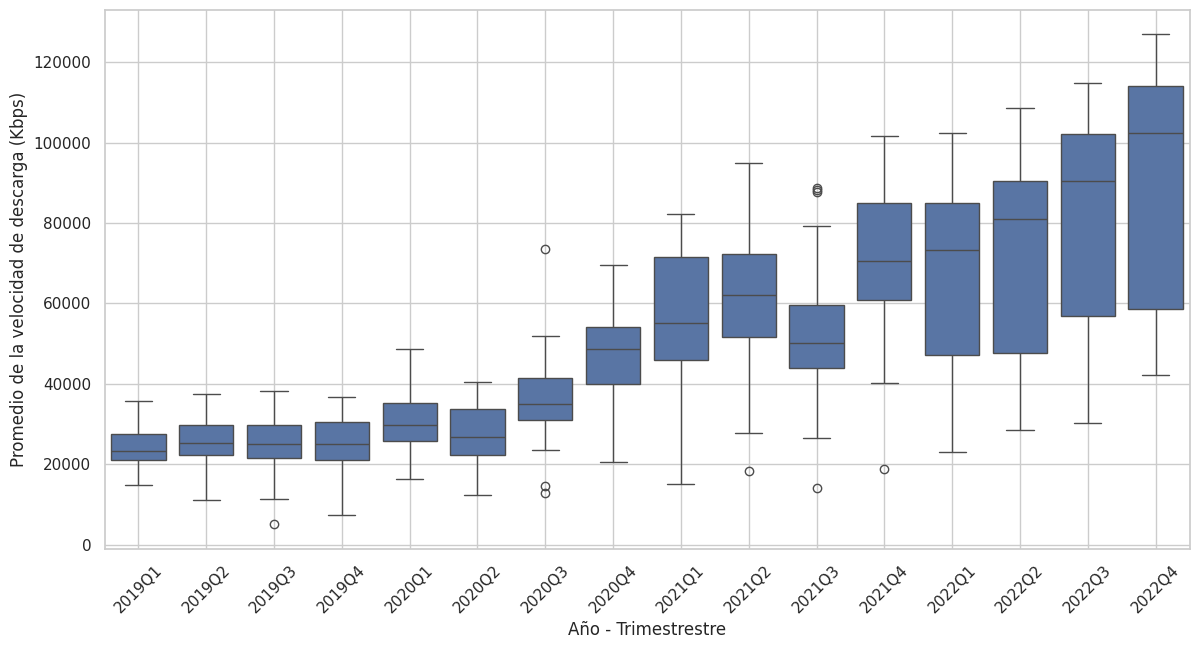

In [ ]:
# Convertir el trimestre y el año en una sola columna de fecha
grouped_data['Year_Quarter'] = grouped_data['Year'].astype(str) + 'Q' + grouped_data['Quarter'].astype(str)

# Crear gráficos de cajas para velocidades de descarga y subida
plt.figure(figsize=(14, 7))
sns.boxplot(data=grouped_data, x='Year_Quarter', y='Avg_Download_Speed_Mean')
plt.xlabel('Año - Trimestrestre')
plt.ylabel('Promedio de la velocidad de descarga (Kbps)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('output/grafico_distribucion_velocidad_internet_lima.png', dpi=300, bbox_inches='tight')
plt.show()

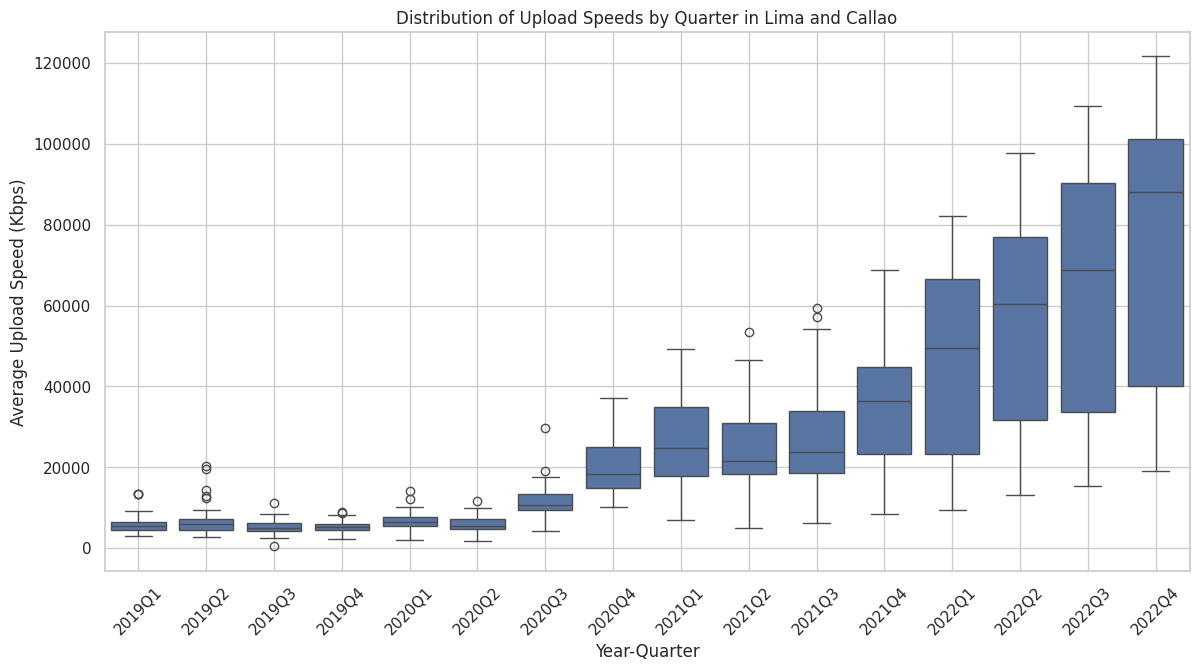

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=grouped_data, x='Year_Quarter', y='Avg_Upload_Speed_Mean')
plt.xlabel('Year-Quarter')
plt.ylabel('Average Upload Speed (Kbps)')
plt.title('Distribution of Upload Speeds by Quarter in Lima and Callao')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Análisis de Lima metropolitana

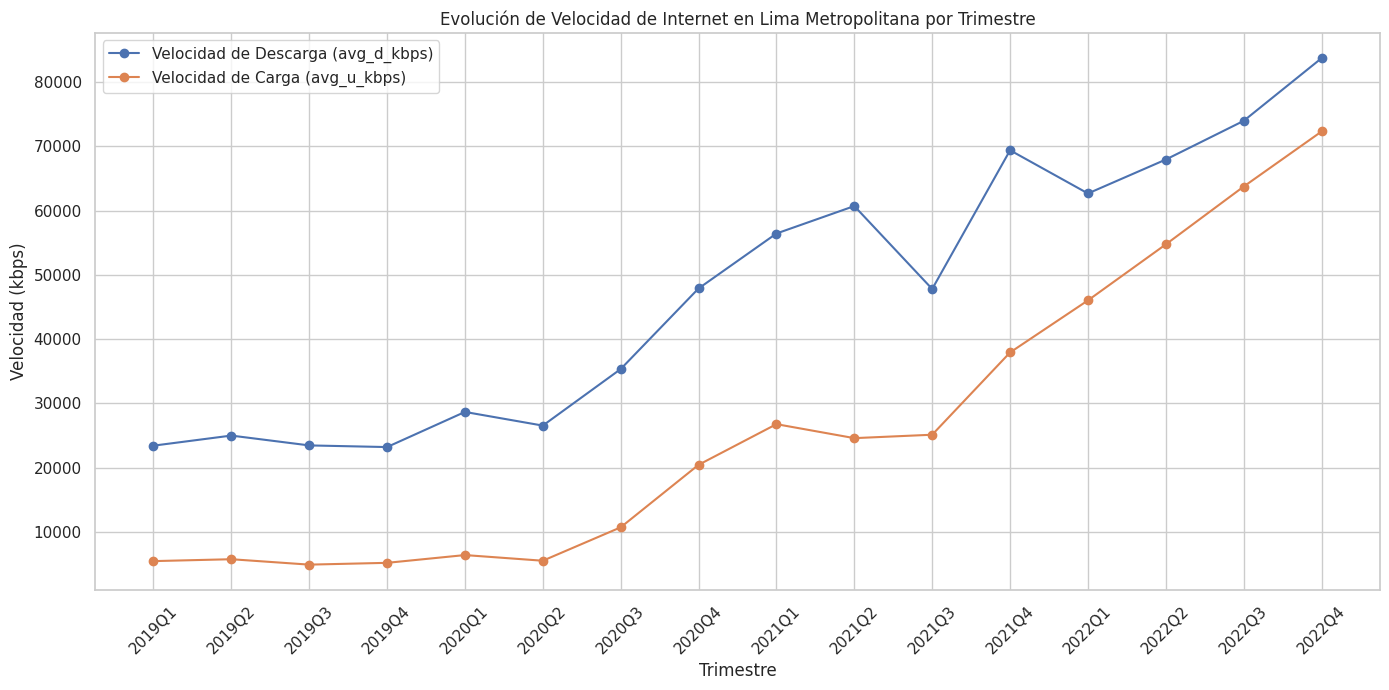

In [ ]:
quarterly_data = lima_metropolitana_data.groupby('year_quarter').agg({'avg_d_kbps': 'mean', 'avg_u_kbps': 'mean'}).reset_index()

# Configurar los gráficos
plt.figure(figsize=(14, 7))

# Graficar la velocidad de descarga promedio
plt.plot(quarterly_data['year_quarter'], quarterly_data['avg_d_kbps'], marker='o', label='Velocidad de Descarga (avg_d_kbps)')
# Graficar la velocidad de carga promedio
plt.plot(quarterly_data['year_quarter'], quarterly_data['avg_u_kbps'], marker='o', label='Velocidad de Carga (avg_u_kbps)')

# Añadir títulos y etiquetas
plt.title('Evolución de Velocidad de Internet en Lima Metropolitana por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad (kbps)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
quarterly_data.to_excel('output/quarterly_data_lima.xlsx',index = False)